In [1]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import mplhep as hep
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sys
import uproot as up
import coffea.hist as hist

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.style.use(hep.style.ROOT)

In [3]:
PATH = "/eos/home-m/matheus/output_AQAg/" # Caminho comum para todos os arquivos .h5

# Função que abre os arquivos .h5

$M_{x} = \sqrt{s}\sqrt{\xi_{\text{proton}_{1}}\xi_{\text{proton}_{2}}}$ 

onde $\sqrt{s}=13000$ é a energia do centro de massa

$ Y_{x} = \dfrac{1}{2} \; \ln{ \left(\dfrac{\xi_{\text{proton}_{1}}}{\xi_{\text{proton}_{2}}}\right) } $

In [4]:
'''def open_file( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset = f['dados']
        #print ( 'antes do corte nos xis:', dset.shape )
        #print ( dset[:,:] )
        array = np.array( dset )
        #array_cut = (array[:,0] > 600) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4) # Corte no xi1 e no xi2
        array_cut = (array[:,5] <= 2.4) & (array[:,10] <= 2.4) & (array[:,8] >= 40) & (array[:,9] >= 53) & (array[:,4] >= 200)
        DataSet_ = array[array_cut]
        arrau_cut_xi = (DataSet_[:,14] > 0.04) & (DataSet_[:,15] > 0.04) & (DataSet_[:,14] < 0.111) & (DataSet_[:,15] < 0.138)        
        DataSet_ = DataSet_[arrau_cut_xi]
        #DataSet_ = array
        Mx = 13000 * ( np.sqrt( DataSet_[:,14] * DataSet_[:,15] ) )
        Yx = 0.5 * ( np.log( DataSet_[:,15] / DataSet_[:,14] ) )
        Mww_Mxx =  DataSet_[:,0] / Mx 
        Yww_Yx = DataSet_[:,13] - Yx
        DataSet = np.concatenate( ( DataSet_, Mx.reshape(-1,1), Yx.reshape(-1,1), Mww_Mxx.reshape(-1,1), Yww_Yx.reshape(-1,1) ), axis = 1 )        
        #mask = np.any( np.isnan( DataSet ) , axis = 1 )
        #print(DataSet.shape)
        print( 'Depois do corte nos xis:', DataSet.shape)
        MultiRP = ( DataSet[:,24] == 1 ) & ( DataSet[:,25] == 1 )
        print( 'MultiRP Events :: ', DataSet[ MultiRP ].shape )
        #return DataSet[ MultiRP ]
        return DataSet'''

"def open_file( file ):\n    df = None\n    with h5py.File( file , 'r' ) as f:\n        dset = f['dados']\n        #print ( 'antes do corte nos xis:', dset.shape )\n        #print ( dset[:,:] )\n        array = np.array( dset )\n        #array_cut = (array[:,0] > 600) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4) # Corte no xi1 e no xi2\n        array_cut = (array[:,5] <= 2.4) & (array[:,10] <= 2.4) & (array[:,8] >= 40) & (array[:,9] >= 53) & (array[:,4] >= 200)\n        DataSet_ = array[array_cut]\n        arrau_cut_xi = (DataSet_[:,14] > 0.04) & (DataSet_[:,15] > 0.04) & (DataSet_[:,14] < 0.111) & (DataSet_[:,15] < 0.138)        \n        DataSet_ = DataSet_[arrau_cut_xi]\n        #DataSet_ = array\n        Mx = 13000 * ( np.sqrt( DataSet_[:,14] * DataSet_[:,15] ) )\n        Yx = 0.5 * ( np.log( DataSet_[:,15] / DataSet_[:,14] ) )\n        Mww_Mxx

In [5]:
def open_file( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset = f['dados']
        #print ( 'antes do corte nos xis:', dset.shape )
        #print ( dset[:,:] )
        array = np.array( dset )
        array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4) 
        DataSet_ = array[array_cut]
        print(DataSet_)
        return DataSet_      
    
def open_file_signal( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset = f['dados']
        #print ( 'antes do corte nos xis:', dset.shape )
        #print ( dset[:,:] )
        array = np.array( dset )
        print(pd.DataFrame(array))
        array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) #& (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4) 
        DataSet_ = array[array_cut]
        print(DataSet_)
        return DataSet_        

# Luminosidade Integrada

In [6]:
SingleMuon_Run2016B = 4.55
SingleMuon_Run2016C = 1.59
SingleMuon_Run2016G = 3.65
Luminosidade        = SingleMuon_Run2016B + SingleMuon_Run2016C + SingleMuon_Run2016G 

# Calculando as Eficiências 

In [7]:
import ROOT
pwd_effi = '/eos/home-m/matheus/SWAN_projects/Acoplamento_Quartico_Anomalo/'

Welcome to JupyROOT 6.24/00


In [8]:
# Eficiência dos Prótons para o Signal

def EffiProtonSignal( Dataset ):
    
    f_SF_Prot_POG = ROOT.TFile.Open( pwd_effi + "PreliminaryEfficiencies_July132020_1D2DMultiTrack.root")

    RadDam_45_F_B = f_SF_Prot_POG.Get("Strips/2016/2016B/h45_2016B_RP3_all_2D")
    RadDam_45_N_B = f_SF_Prot_POG.Get("Strips/2016/2016B/h45_2016B_RP2_all_2D")
    RadDam_45_F_C = f_SF_Prot_POG.Get("Strips/2016/2016C/h45_2016C_RP3_all_2D")
    RadDam_45_N_C = f_SF_Prot_POG.Get("Strips/2016/2016C/h45_2016C_RP2_all_2D")
    RadDam_45_F_G = f_SF_Prot_POG.Get("Strips/2016/2016G/h45_2016G_RP3_all_2D")
    RadDam_45_N_G = f_SF_Prot_POG.Get("Strips/2016/2016G/h45_2016G_RP2_all_2D")
    RadDam_56_F_B = f_SF_Prot_POG.Get("Strips/2016/2016B/h56_2016B_RP103_all_2D")
    RadDam_56_N_B = f_SF_Prot_POG.Get("Strips/2016/2016B/h56_2016B_RP102_all_2D")
    RadDam_56_F_C = f_SF_Prot_POG.Get("Strips/2016/2016C/h56_2016C_RP103_all_2D")
    RadDam_56_N_C = f_SF_Prot_POG.Get("Strips/2016/2016C/h56_2016C_RP102_all_2D")
    RadDam_56_F_G = f_SF_Prot_POG.Get("Strips/2016/2016G/h56_2016G_RP103_all_2D")
    RadDam_56_N_G = f_SF_Prot_POG.Get("Strips/2016/2016G/h56_2016G_RP102_all_2D")

    multitrack_45_F_B = f_SF_Prot_POG.Get("Strips/2016/2016B/h45multitrackeff_2016B_avg_RP3")
    multitrack_45_F_C = f_SF_Prot_POG.Get("Strips/2016/2016C/h45multitrackeff_2016C_avg_RP3")
    multitrack_45_F_G = f_SF_Prot_POG.Get("Strips/2016/2016G/h45multitrackeff_2016G_avg_RP3")
    multitrack_45_N_B = f_SF_Prot_POG.Get("Strips/2016/2016B/h45multitrackeff_2016B_avg_RP2")
    multitrack_45_N_C = f_SF_Prot_POG.Get("Strips/2016/2016C/h45multitrackeff_2016C_avg_RP2")
    multitrack_45_N_G = f_SF_Prot_POG.Get("Strips/2016/2016G/h45multitrackeff_2016G_avg_RP2")
    multitrack_56_F_B = f_SF_Prot_POG.Get("Strips/2016/2016B/h56multitrackeff_2016B_avg_RP103")
    multitrack_56_F_C = f_SF_Prot_POG.Get("Strips/2016/2016C/h56multitrackeff_2016C_avg_RP103")
    multitrack_56_F_G = f_SF_Prot_POG.Get("Strips/2016/2016G/h56multitrackeff_2016G_avg_RP103")
    multitrack_56_N_B = f_SF_Prot_POG.Get("Strips/2016/2016B/h56multitrackeff_2016B_avg_RP102")
    multitrack_56_N_C = f_SF_Prot_POG.Get("Strips/2016/2016C/h56multitrackeff_2016C_avg_RP102")
    multitrack_56_N_G = f_SF_Prot_POG.Get("Strips/2016/2016G/h56multitrackeff_2016G_avg_RP102")
    
    
    weigth_multitrack_45_F_B = multitrack_45_F_B.GetBinContent(1);
    weigth_multitrack_45_F_C = multitrack_45_F_C.GetBinContent(1);
    weigth_multitrack_45_F_G = multitrack_45_F_G.GetBinContent(1);
    weigth_multitrack_45_N_B = multitrack_45_N_B.GetBinContent(1);
    weigth_multitrack_45_N_C = multitrack_45_N_C.GetBinContent(1);
    weigth_multitrack_45_N_G = multitrack_45_N_G.GetBinContent(1);
    weigth_multitrack_56_F_B = multitrack_56_F_B.GetBinContent(1);
    weigth_multitrack_56_F_C = multitrack_56_F_C.GetBinContent(1);
    weigth_multitrack_56_F_G = multitrack_56_F_G.GetBinContent(1);
    weigth_multitrack_56_N_B = multitrack_56_N_B.GetBinContent(1);
    weigth_multitrack_56_N_C = multitrack_56_N_C.GetBinContent(1);
    weigth_multitrack_56_N_G = multitrack_56_N_G.GetBinContent(1);
    
    
    w_raddam_45_Multi_B_N = []
    w_raddam_45_Multi_C_N = []
    w_raddam_45_Multi_G_N = []
    w_raddam_45_Multi_B_F = []
    w_raddam_45_Multi_C_F = []
    w_raddam_45_Multi_G_F = []

    for i in range(0, len( Dataset ) ):
        if [ Dataset[:,23] == 0 ][0][i]: 
            w_raddam_45_Multi_B_N.append( RadDam_45_N_B.GetBinContent( RadDam_45_N_B.GetXaxis().FindBin(Dataset[:,27][i] ), RadDam_45_N_B.GetYaxis().FindBin( Dataset[:,29][i] ) ) )
            w_raddam_45_Multi_C_N.append( RadDam_45_N_C.GetBinContent( RadDam_45_N_C.GetXaxis().FindBin(Dataset[:,27][i] ), RadDam_45_N_C.GetYaxis().FindBin( Dataset[:,29][i] ) ) )
            w_raddam_45_Multi_G_N.append( RadDam_45_N_G.GetBinContent( RadDam_45_N_G.GetXaxis().FindBin(Dataset[:,27][i] ), RadDam_45_N_G.GetYaxis().FindBin( Dataset[:,29][i] ) ) )
            w_raddam_45_Multi_B_F.append( RadDam_45_F_B.GetBinContent( RadDam_45_F_B.GetXaxis().FindBin(Dataset[:,31][i] ), RadDam_45_F_B.GetYaxis().FindBin( Dataset[:,33][i] ) ) )
            w_raddam_45_Multi_C_F.append( RadDam_45_F_C.GetBinContent( RadDam_45_F_C.GetXaxis().FindBin(Dataset[:,31][i] ), RadDam_45_F_C.GetYaxis().FindBin( Dataset[:,33][i] ) ) )            
            w_raddam_45_Multi_G_F.append( RadDam_45_F_G.GetBinContent( RadDam_45_F_G.GetXaxis().FindBin(Dataset[:,31][i] ), RadDam_45_F_G.GetYaxis().FindBin( Dataset[:,33][i] ) ) )  
    
    
    
    w_raddam_45_Multi = ((4.55/9.79)*np.array(w_raddam_45_Multi_B_N)+(1.59/9.79)*np.array(w_raddam_45_Multi_C_N)+(3.65/9.79)*np.array(w_raddam_45_Multi_G_N))*((4.55/9.79)*np.array(w_raddam_45_Multi_B_F)+(1.59/9.79)*np.array(w_raddam_45_Multi_C_F)+(3.65/9.79)*np.array(w_raddam_45_Multi_G_F) )        

    w_raddam_56_Multi_B_N = []
    w_raddam_56_Multi_C_N = []
    w_raddam_56_Multi_G_N = []
    w_raddam_56_Multi_B_F = []
    w_raddam_56_Multi_C_F = []
    w_raddam_56_Multi_G_F = []

    for i in range(0, len( Dataset ) ):
        if [ Dataset[:,24] == 1 ][0][i]: 
            w_raddam_56_Multi_B_N.append( RadDam_56_N_B.GetBinContent( RadDam_56_N_B.GetXaxis().FindBin(Dataset[:,28][i] ), RadDam_56_N_B.GetYaxis().FindBin( Dataset[:,30][i] ) ) )
            w_raddam_56_Multi_C_N.append( RadDam_56_N_C.GetBinContent( RadDam_56_N_C.GetXaxis().FindBin(Dataset[:,28][i] ), RadDam_56_N_C.GetYaxis().FindBin( Dataset[:,30][i] ) ) )
            w_raddam_56_Multi_G_N.append( RadDam_56_N_G.GetBinContent( RadDam_56_N_G.GetXaxis().FindBin(Dataset[:,28][i] ), RadDam_56_N_G.GetYaxis().FindBin( Dataset[:,30][i] ) ) )
            w_raddam_56_Multi_B_F.append( RadDam_56_F_B.GetBinContent( RadDam_56_F_B.GetXaxis().FindBin(Dataset[:,32][i] ), RadDam_56_F_B.GetYaxis().FindBin( Dataset[:,34][i] ) ) )
            w_raddam_56_Multi_C_F.append( RadDam_56_F_C.GetBinContent( RadDam_56_F_C.GetXaxis().FindBin(Dataset[:,32][i] ), RadDam_56_F_C.GetYaxis().FindBin( Dataset[:,34][i] ) ) )            
            w_raddam_56_Multi_G_F.append( RadDam_56_F_G.GetBinContent( RadDam_56_F_G.GetXaxis().FindBin(Dataset[:,32][i] ), RadDam_56_F_G.GetYaxis().FindBin( Dataset[:,34][i] ) ) )  
    
    w_raddam_56_Multi = ( (4.55/9.79)*np.array(w_raddam_56_Multi_B_N)+(1.59/9.79)*np.array(w_raddam_56_Multi_C_N)+(3.65/9.79)*np.array(w_raddam_56_Multi_G_N))*((4.55/9.79)*np.array(w_raddam_56_Multi_B_F)+(1.59/9.79)*np.array(w_raddam_56_Multi_C_F)+(3.65/9.79)*np.array(w_raddam_56_Multi_G_F) )        
    
    weigth_45_N = weigth_multitrack_45_N_B*(4.55/9.79) + weigth_multitrack_45_N_C*(1.59/9.79) + weigth_multitrack_45_N_G*(3.65/9.79);
    weigth_45_F = weigth_multitrack_45_F_B*(4.55/9.79) + weigth_multitrack_45_F_C*(1.59/9.79) + weigth_multitrack_45_F_G*(3.65/9.79);
    weigth_45 = (weigth_45_N+weigth_45_F)/2;
    weigth_56_N = weigth_multitrack_56_N_B*(4.55/9.79) + weigth_multitrack_56_N_C*(1.59/9.79) + weigth_multitrack_56_N_G*(3.65/9.79);
    weigth_56_F = weigth_multitrack_56_F_B*(4.55/9.79) + weigth_multitrack_56_F_C*(1.59/9.79) + weigth_multitrack_56_F_G*(3.65/9.79);
    weigth_56 = (weigth_56_N+weigth_56_F)/2;
    
    # Muon Efficiency
    f_SF_ID_BC = ROOT.TFile.Open(pwd_effi + "EfficienciesStudies_2016_legacy_rereco_rootfiles_RunBCDEF_SF_ID.root")
    f_SF_ISO_BC = ROOT.TFile.Open(pwd_effi +  "EfficienciesStudies_2016_legacy_rereco_rootfiles_RunBCDEF_SF_ISO.root" )
    f_SF_trg_BC = ROOT.TFile.Open(pwd_effi +  "EfficienciesAndSF_trg_RunBtoF.root" )
    f_SF_ID_G = ROOT.TFile.Open(pwd_effi + "EfficienciesStudies_2016_legacy_rereco_rootfiles_RunGH_SF_ID.root")
    f_SF_ISO_G = ROOT.TFile.Open(pwd_effi + "EfficienciesStudies_2016_legacy_rereco_rootfiles_RunGH_SF_ISO.root")
    f_SF_trg_G = ROOT.TFile.Open(pwd_effi + "EfficienciesAndSF_trg_RunGH.root")

    h_SF_ID_BC = f_SF_ID_BC.Get("NUM_TightID_DEN_genTracks_eta_pt")
    h_SF_ISO_BC = f_SF_ISO_BC.Get("NUM_TightRelIso_DEN_TightIDandIPCut_eta_pt")
    h_SF_TRG_BC = f_SF_trg_BC.Get("IsoMu24_OR_IsoTkMu24_PtEtaBins/abseta_pt_ratio")
    h_SF_ID_G = f_SF_ID_G.Get("NUM_TightID_DEN_genTracks_eta_pt")
    h_SF_ISO_G = f_SF_ISO_G.Get("NUM_TightRelIso_DEN_TightIDandIPCut_eta_pt")
    h_SF_TRG_G = f_SF_trg_G.Get("IsoMu24_OR_IsoTkMu24_PtEtaBins/abseta_pt_ratio")

    # Extra Tracks Reweight
    f_track_re = ROOT.TFile.Open( "Extra_track_reweight.root" )
    
    h_track_re = f_track_re.Get( "h5" )
    
    weigth_id_BC  = [] # For muon 
    weigth_iso_BC = [] # For muon
    weigth_trg_BC = [] # For muon
    weight_id_G = []   # For muon
    weight_iso_G = []  # For muon
    weight_trg_G = []  # For muon
    
    weigth_track_re = [] # For Extra Tracks


    for i in range( 0, len( Dataset ) ):
        if  [Dataset[:,9] < 120][0][i] :
            weigth_id_BC.append( h_SF_ID_BC.GetBinContent( h_SF_ID_BC.GetXaxis().FindBin( Dataset[:,10][i] ), h_SF_ISO_BC.GetYaxis().FindBin( Dataset[:,9][i] ) ) )
        else:
            weigth_id_BC.append( h_SF_ID_BC.GetBinContent( h_SF_ID_BC.GetXaxis().FindBin( Dataset[:,10][i] ), h_SF_ISO_BC.GetYaxis().FindBin( 119 ) ) )
       
    
    for i in range( 0, len( Dataset ) ):
        if  [Dataset[:,9] < 120][0][i] :
            weigth_iso_BC.append( h_SF_ISO_BC.GetBinContent( h_SF_ISO_BC.GetXaxis().FindBin( Dataset[:,10][i] ), h_SF_ISO_BC.GetYaxis().FindBin( Dataset[:,9][i] ) ) )
        else:
            weigth_iso_BC.append( h_SF_ISO_BC.GetBinContent( h_SF_ISO_BC.GetXaxis().FindBin( Dataset[:,10][i] ), h_SF_ISO_BC.GetYaxis().FindBin( 119 ) ) )
   
    for i in range( 0, len( Dataset ) ):
        if  [Dataset[:,9] < 120][0][i] :
            weight_id_G.append( h_SF_ID_G.GetBinContent( h_SF_ID_G.GetXaxis().FindBin( Dataset[:,10][i] ), h_SF_ID_G.GetYaxis().FindBin( Dataset[:,9][i] ) ) )
        else:
            weight_id_G.append( h_SF_ID_G.GetBinContent( h_SF_ID_G.GetXaxis().FindBin( Dataset[:,10][i] ), h_SF_ID_G.GetYaxis().FindBin( 119 ) ) )
    
    for i in range( 0, len( Dataset ) ):
        if  [Dataset[:,9] < 120][0][i] :
            weight_iso_G.append( h_SF_ISO_G.GetBinContent( h_SF_ISO_G.GetXaxis().FindBin( Dataset[:,10][i] ), h_SF_ISO_G.GetYaxis().FindBin( Dataset[:,9][i] ) ) )
        else:
            weight_iso_G.append( h_SF_ISO_G.GetBinContent( h_SF_ISO_G.GetXaxis().FindBin( Dataset[:,10][i] ), h_SF_ISO_G.GetYaxis().FindBin( 119 ) ) )

        
    for i in range( 0, len( Dataset ) ):
        if  [Dataset[:,9] < 500][0][i] :
            weigth_trg_BC.append( h_SF_TRG_BC.GetBinContent( h_SF_TRG_BC.GetXaxis().FindBin( Dataset[:,10][i] ), h_SF_TRG_BC.GetYaxis().FindBin( Dataset[:,9][i] ) ) )
        else:
            weigth_trg_BC.append( h_SF_TRG_BC.GetBinContent( h_SF_TRG_BC.GetXaxis().FindBin( Dataset[:,10][i] ), h_SF_TRG_BC.GetYaxis().FindBin( 499 ) ) )
    
    for i in range( 0, len( Dataset ) ):
        if  [Dataset[:,9] < 500][0][i] :
            weight_trg_G.append( h_SF_TRG_G.GetBinContent( h_SF_TRG_G.GetXaxis().FindBin( Dataset[:,10][i] ), h_SF_TRG_G.GetYaxis().FindBin( Dataset[:,9][i] ) ) )
        else:
            weight_trg_G.append( h_SF_TRG_G.GetBinContent( h_SF_TRG_G.GetXaxis().FindBin( Dataset[:,10][i] ), h_SF_TRG_G.GetYaxis().FindBin( 499 ) ) )
                     
        
    for i in range( 0, len( Dataset ) ):
        if  [Dataset[:,11] == 0][0][i] :
            weigth_track_re.append( h_track_re.GetBinContent( h_track_re.GetXaxis().FindBin( 0.1 ) ) )
        else:
            weigth_track_re.append( h_track_re.GetBinContent( h_track_re.GetXaxis().FindBin( Dataset[:,11][i] ) ) )
            
    weigth_id = np.array( weigth_id_BC )*(6.14/9.79) + np.array( weight_id_G )*(3.65/9.79)
    weigth_iso = np.array( weigth_iso_BC )*(6.14/9.79) + np.array( weight_iso_G )*(3.65/9.79)
    weigth_trg = np.array( weigth_trg_BC )*(6.14/9.79) + np.array( weight_trg_G )*(3.65/9.79)
    print(w_raddam_45_Multi.shape)
    print(weigth_id.shape)
    return w_raddam_45_Multi * weigth_45 * w_raddam_56_Multi * weigth_56 * weigth_id * weigth_iso * weigth_trg   

In [9]:
def EfficienciesStudies( DataSet ):
    
    # Muon Efficiency
    f_SF_ID_BC = ROOT.TFile.Open(pwd_effi + "EfficienciesStudies_2016_legacy_rereco_rootfiles_RunBCDEF_SF_ID.root")
    f_SF_ISO_BC = ROOT.TFile.Open(pwd_effi +  "EfficienciesStudies_2016_legacy_rereco_rootfiles_RunBCDEF_SF_ISO.root" )
    f_SF_trg_BC = ROOT.TFile.Open(pwd_effi +  "EfficienciesAndSF_trg_RunBtoF.root" )
    f_SF_ID_G = ROOT.TFile.Open(pwd_effi + "EfficienciesStudies_2016_legacy_rereco_rootfiles_RunGH_SF_ID.root")
    f_SF_ISO_G = ROOT.TFile.Open(pwd_effi + "EfficienciesStudies_2016_legacy_rereco_rootfiles_RunGH_SF_ISO.root")
    f_SF_trg_G = ROOT.TFile.Open(pwd_effi + "EfficienciesAndSF_trg_RunGH.root")

    h_SF_ID_BC = f_SF_ID_BC.Get("NUM_TightID_DEN_genTracks_eta_pt")
    h_SF_ISO_BC = f_SF_ISO_BC.Get("NUM_TightRelIso_DEN_TightIDandIPCut_eta_pt")
    h_SF_TRG_BC = f_SF_trg_BC.Get("IsoMu24_OR_IsoTkMu24_PtEtaBins/abseta_pt_ratio")
    h_SF_ID_G = f_SF_ID_G.Get("NUM_TightID_DEN_genTracks_eta_pt")
    h_SF_ISO_G = f_SF_ISO_G.Get("NUM_TightRelIso_DEN_TightIDandIPCut_eta_pt")
    h_SF_TRG_G = f_SF_trg_G.Get("IsoMu24_OR_IsoTkMu24_PtEtaBins/abseta_pt_ratio")

    # Extra Tracks Reweight
    f_track_re = ROOT.TFile.Open( "Extra_track_reweight.root" )
    
    h_track_re = f_track_re.Get( "h5" )
    
    weigth_id_BC  = [] # For muon 
    weigth_iso_BC = [] # For muon
    weigth_trg_BC = [] # For muon
    weight_id_G = []   # For muon
    weight_iso_G = []  # For muon
    weight_trg_G = []  # For muon
    
    weigth_track_re = [] # For Extra Tracks


    for i in range( 0, len( DataSet ) ):
        if  [DataSet[:,9] < 120][0][i] :
            weigth_id_BC.append( h_SF_ID_BC.GetBinContent( h_SF_ID_BC.GetXaxis().FindBin( DataSet[:,10][i] ), h_SF_ISO_BC.GetYaxis().FindBin( DataSet[:,9][i] ) ) )
        else:
            weigth_id_BC.append( h_SF_ID_BC.GetBinContent( h_SF_ID_BC.GetXaxis().FindBin( DataSet[:,10][i] ), h_SF_ISO_BC.GetYaxis().FindBin( 119 ) ) )
       
    
    for i in range( 0, len( DataSet ) ):
        if  [DataSet[:,9] < 120][0][i] :
            weigth_iso_BC.append( h_SF_ISO_BC.GetBinContent( h_SF_ISO_BC.GetXaxis().FindBin( DataSet[:,10][i] ), h_SF_ISO_BC.GetYaxis().FindBin( DataSet[:,9][i] ) ) )
        else:
            weigth_iso_BC.append( h_SF_ISO_BC.GetBinContent( h_SF_ISO_BC.GetXaxis().FindBin( DataSet[:,10][i] ), h_SF_ISO_BC.GetYaxis().FindBin( 119 ) ) )
   
    for i in range( 0, len( DataSet ) ):
        if  [DataSet[:,9] < 120][0][i] :
            weight_id_G.append( h_SF_ID_G.GetBinContent( h_SF_ID_G.GetXaxis().FindBin( DataSet[:,10][i] ), h_SF_ID_G.GetYaxis().FindBin( DataSet[:,9][i] ) ) )
        else:
            weight_id_G.append( h_SF_ID_G.GetBinContent( h_SF_ID_G.GetXaxis().FindBin( DataSet[:,10][i] ), h_SF_ID_G.GetYaxis().FindBin( 119 ) ) )
    
    for i in range( 0, len( DataSet ) ):
        if  [DataSet[:,9] < 120][0][i] :
            weight_iso_G.append( h_SF_ISO_G.GetBinContent( h_SF_ISO_G.GetXaxis().FindBin( DataSet[:,10][i] ), h_SF_ISO_G.GetYaxis().FindBin( DataSet[:,9][i] ) ) )
        else:
            weight_iso_G.append( h_SF_ISO_G.GetBinContent( h_SF_ISO_G.GetXaxis().FindBin( DataSet[:,10][i] ), h_SF_ISO_G.GetYaxis().FindBin( 119 ) ) )

        
    for i in range( 0, len( DataSet ) ):
        if  [DataSet[:,9] < 500][0][i] :
            weigth_trg_BC.append( h_SF_TRG_BC.GetBinContent( h_SF_TRG_BC.GetXaxis().FindBin( DataSet[:,10][i] ), h_SF_TRG_BC.GetYaxis().FindBin( DataSet[:,9][i] ) ) )
        else:
            weigth_trg_BC.append( h_SF_TRG_BC.GetBinContent( h_SF_TRG_BC.GetXaxis().FindBin( DataSet[:,10][i] ), h_SF_TRG_BC.GetYaxis().FindBin( 499 ) ) )
    
    for i in range( 0, len( DataSet ) ):
        if  [DataSet[:,9] < 500][0][i] :
            weight_trg_G.append( h_SF_TRG_G.GetBinContent( h_SF_TRG_G.GetXaxis().FindBin( DataSet[:,10][i] ), h_SF_TRG_G.GetYaxis().FindBin( DataSet[:,9][i] ) ) )
        else:
            weight_trg_G.append( h_SF_TRG_G.GetBinContent( h_SF_TRG_G.GetXaxis().FindBin( DataSet[:,10][i] ), h_SF_TRG_G.GetYaxis().FindBin( 499 ) ) )
                     
        
    for i in range( 0, len( DataSet ) ):
        if  [DataSet[:,11] == 0][0][i] :
            weigth_track_re.append( h_track_re.GetBinContent( h_track_re.GetXaxis().FindBin( 0.1 ) ) )
        else:
            weigth_track_re.append( h_track_re.GetBinContent( h_track_re.GetXaxis().FindBin( DataSet[:,11][i] ) ) )
            
    weigth_id = np.array( weigth_id_BC )*(6.14/9.79) + np.array( weight_id_G )*(3.65/9.79)
    weigth_iso = np.array( weigth_iso_BC )*(6.14/9.79) + np.array( weight_iso_G )*(3.65/9.79)
    weigth_trg = np.array( weigth_trg_BC )*(6.14/9.79) + np.array( weight_trg_G )*(3.65/9.79)
    

    return weigth_id*weigth_iso*weigth_trg*np.array(weigth_track_re)

* ## Normalização 

Seção de Choque

In [10]:
cross_section_SM       = 40.41*0.17
cross_section_ANOMALO1 = 166.1*0.17 
cross_section_ANOMALO2 = 41.90*0.17
cross_section_ANOMALO3 = 48.75*0.17
cross_section_ANOMALO4 = 61.14*0.17
cross_section_ANOMALO5 = 41.58*0.17
cross_section_ANOMALO6 = 44.93*0.17
cross_section_ANOMALO7 = 58.18*0.17 
cross_section_ANOMALO8 = 150.3*0.17

Número de Eventos 

In [11]:
number_events_SM       = 35000
number_events_ANOMALO1 = 35000
number_events_ANOMALO2 = 35000
number_events_ANOMALO3 = 35000
number_events_ANOMALO4 = 35000
number_events_ANOMALO5 = 35000
number_events_ANOMALO6 = 35000
number_events_ANOMALO7 = 35000
number_events_ANOMALO8 = 35000

Normalizacao dos eventos de SIGNAL

In [12]:
norm_SM = ( cross_section_SM * Luminosidade ) / ( number_events_SM )
norm_ANOMALO1 = ( cross_section_ANOMALO1 * Luminosidade ) / ( number_events_ANOMALO1 )
norm_ANOMALO2 = ( cross_section_ANOMALO2 * Luminosidade ) / ( number_events_ANOMALO2 )
norm_ANOMALO3 = ( cross_section_ANOMALO3 * Luminosidade ) / ( number_events_ANOMALO3 )
norm_ANOMALO4 = ( cross_section_ANOMALO4 * Luminosidade ) / ( number_events_ANOMALO4 )
norm_ANOMALO5 = ( cross_section_ANOMALO5 * Luminosidade ) / ( number_events_ANOMALO5 )
norm_ANOMALO6 = ( cross_section_ANOMALO6 * Luminosidade ) / ( number_events_ANOMALO6 )
norm_ANOMALO7 = ( cross_section_ANOMALO7 * Luminosidade ) / ( number_events_ANOMALO7 )
norm_ANOMALO8 = ( cross_section_ANOMALO8 * Luminosidade ) / ( number_events_ANOMALO8 )

* ## Importando as amostras de Signal

In [13]:
SM =       open_file_signal( '/eos/home-m/matheus/output_AQAg/output-SM.h5')
ANOMALO1 = open_file_signal( '/eos/home-m/matheus/output_AQAg/output-ANOMALO1.h5')
ANOMALO2 = open_file_signal( '/eos/home-m/matheus/output_AQAg/output-ANOMALO2.h5')
ANOMALO3 = open_file_signal( '/eos/home-m/matheus/output_AQAg/output-ANOMALO3.h5')
ANOMALO4 = open_file_signal( '/eos/home-m/matheus/output_AQAg/output-ANOMALO4.h5')
ANOMALO5 = open_file_signal( '/eos/home-m/matheus/output_AQAg/output-ANOMALO5.h5')
ANOMALO6 = open_file_signal( '/eos/home-m/matheus/output_AQAg/output-ANOMALO6.h5')
ANOMALO7 = open_file_signal( '/eos/home-m/matheus/output_AQAg/output-ANOMALO7.h5')
ANOMALO8 = open_file_signal( '/eos/home-m/matheus/output_AQAg/output-ANOMALO8.h5')

               0           1         2         3           4         5   \
0      637.139148  254.429644  3.069609  2.526058  236.481611  0.369725   
1      374.422210  173.647905  3.101824 -3.050663  174.612089  1.430213   
2      646.534168  248.650981 -3.065255 -2.605013  209.514584  2.056993   
3      702.707135  284.814121 -3.080628 -2.543897  298.223345  0.138065   
4     1649.087904  319.642972  3.132919  2.827678  330.301452  1.528749   
...           ...         ...       ...       ...         ...       ...   
2350          NaN         NaN       NaN -3.104199  391.255886  0.301417   
2351   432.252511  204.477885  3.082903  3.114172  211.158450  1.577768   
2352   700.413751  335.900732 -3.131853 -2.963072  348.252626  1.226293   
2353   455.429812  226.432165  2.928620  2.754937  170.302014  0.189593   
2354   640.844956  243.864934  3.015517  3.124944  253.029269  0.446503   

             6         7           8           9   ...   25   26         27  \
0      8.828279  0.7

<ipython-input-5-a4bb0f05cc60>:21: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) #& (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:21: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) #& (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


                0           1         2         3           4         5   \
0      1464.912537  464.060132  3.124897 -3.119953  462.924162  0.218007   
1      1126.157652  526.880950 -3.114235  2.829327  535.876462  0.600692   
2      1355.680503  655.248793 -3.126095  3.082517  669.858980  0.480914   
3       828.945606  337.388298  3.069606  0.610018  337.219357  1.043172   
4      1002.073114  477.793826  3.081743  3.064099  457.499916  0.150724   
...            ...         ...       ...       ...         ...       ...   
25531  1886.216028  526.030896 -3.053787 -2.890175  565.470631  0.774636   
25532  1730.300655  859.196909 -3.092253 -3.044220  855.203409  0.168985   
25533  1518.714214  551.768434 -3.130338 -3.012912  550.378910  1.072309   
25534          NaN         NaN       NaN -3.128736  646.921645  0.297538   
25535  1297.651374  622.103667 -3.129941  3.084851  656.552661  0.751168   

              6         7           8           9   ...   25   26          27  \
0     

<ipython-input-5-a4bb0f05cc60>:21: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) #& (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:21: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) #& (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:21: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] 

               0           1         2         3           4         5   \
0             NaN  147.625675       NaN       NaN         NaN       NaN   
1      425.250565  210.581337 -3.139530  3.105408  204.001648  0.320759   
2             NaN         NaN       NaN  3.094213  189.159653  2.369713   
3     1589.896970  633.168439 -3.064868 -2.478211  692.911510  0.343625   
4             NaN  171.671391       NaN       NaN         NaN       NaN   
...           ...         ...       ...       ...         ...       ...   
3128   549.228951  233.888165  3.020716  2.859464  229.376688  0.493966   
3129  2296.848476  141.117775 -2.851811 -2.975998  223.581090  2.242994   
3130   500.028523  207.426719 -3.135801  2.231317  207.151767  0.561144   
3131          NaN  163.464229       NaN       NaN         NaN       NaN   
3132   423.378415  185.396331 -3.077267 -2.734587  211.229519  0.536721   

             6         7           8           9   ...   25   26          27  \
0           NaN    

<ipython-input-5-a4bb0f05cc60>:21: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) #& (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:21: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) #& (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:21: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] 

                0           1         2         3            4         5   \
0      1091.432084  510.926240  3.117518  3.060315   512.252382  0.588001   
1      1778.201830  846.230928  3.104388  3.052683   862.464686  0.298285   
2      1920.930021  854.540478  3.140590 -3.061119   838.507195  0.698255   
3      1993.112506  925.352860 -3.136568 -3.133461   939.262105  0.502030   
4      1731.802760  412.051876  3.126609  3.065333   431.156741  1.346926   
...            ...         ...       ...       ...          ...       ...   
24667  1237.172832  371.406983  3.073218  3.086816   496.380795  0.664912   
24668  2302.993605   55.799138 -0.007997  3.134040  1022.205139  0.496262   
24669   812.563806  373.427818 -3.117622 -2.618108   415.550742  0.382081   
24670  1154.547111  468.333740 -3.104570 -2.927254   455.998313  0.138360   
24671  1180.212472  510.869276  3.108131 -0.263495   507.269857  0.197979   

              6         7           8           9   ...   25   26          

<ipython-input-5-a4bb0f05cc60>:21: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) #& (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:21: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) #& (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


In [14]:
pd.DataFrame(ANOMALO1)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1464.912537,464.060132,3.124897,-3.119953,462.924162,0.218007,13.116200,0.529439,376.916046,88.606506,...,1.0,0.0,3.894287,-999.000000,-0.324219,-999.000000,3.620361,-999.000000,-0.428009,-999.000000
1,1126.157652,526.880950,-3.114235,2.829327,535.876462,0.600692,49.579361,0.323783,41.361801,488.076263,...,1.0,0.0,10.231445,-999.000000,-1.120117,-999.000000,9.871094,-999.000000,-1.275879,-999.000000
2,1355.680503,655.248793,-3.126095,3.082517,669.858980,0.480914,76.008347,0.437375,455.670807,203.693573,...,1.0,0.0,8.698730,-999.000000,-2.593750,-999.000000,8.574707,-999.000000,-3.065430,-999.000000
3,1002.073114,477.793826,3.081743,3.064099,457.499916,0.150724,68.873322,0.516303,45.144146,432.657440,...,1.0,1.0,7.805176,4.513428,-1.237915,1.355835,7.431396,4.273438,-1.399658,1.846191
4,1701.789500,744.289726,-3.121886,-3.042725,740.555715,0.469678,18.632336,0.744391,408.788422,338.329315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20846,2137.558013,1035.797594,-3.117654,-3.123860,1048.625879,0.251251,82.106125,0.418347,973.545105,62.563663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20847,1886.216028,526.030896,-3.053787,-2.890175,565.470631,0.774636,26.964764,0.754189,334.077789,203.812973,...,1.0,0.0,11.224609,-999.000000,1.120117,-999.000000,11.222168,-999.000000,1.276123,-999.000000
20848,1730.300655,859.196909,-3.092253,-3.044220,855.203409,0.168985,75.302948,0.390224,720.566711,143.688629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20849,1518.714214,551.768434,-3.130338,-3.012912,550.378910,1.072309,62.525097,0.401431,306.953125,249.533997,...,1.0,0.0,10.222168,-999.000000,-1.709595,-999.000000,10.189453,-999.000000,-1.964478,-999.000000


## Concatenando os pesos no array dos eventos 

In [15]:
weight_SM = np.array( [ norm_SM ]*len( SM ) ).reshape(-1,1)
SM = np.concatenate( ( SM , weight_SM ) , axis = 1 )

weight_ANOMALO1 = np.array( [ norm_ANOMALO1 ]*len( ANOMALO1 ) ).reshape(-1,1)
ANOMALO1 = np.concatenate( ( ANOMALO1 , weight_ANOMALO1 ) , axis = 1 )

weight_ANOMALO2 = np.array( [ norm_ANOMALO2 ]*len( ANOMALO2 ) ).reshape(-1,1)
ANOMALO2 = np.concatenate( ( ANOMALO2 , weight_ANOMALO2 ) , axis = 1 )

weight_ANOMALO3 = np.array( [ norm_ANOMALO3 ]*len( ANOMALO3 ) ).reshape(-1,1)
ANOMALO3 = np.concatenate( ( ANOMALO3 , weight_ANOMALO3 ) , axis = 1 )

weight_ANOMALO4 = np.array( [ norm_ANOMALO4 ]*len( ANOMALO4 ) ).reshape(-1,1)
ANOMALO4 = np.concatenate( ( ANOMALO4 , weight_ANOMALO4 ) , axis = 1 )

weight_ANOMALO5 = np.array( [ norm_ANOMALO5 ]*len( ANOMALO5 ) ).reshape(-1,1)
ANOMALO5 = np.concatenate( ( ANOMALO5 , weight_ANOMALO5 ) , axis = 1 )

weight_ANOMALO6 = np.array( [ norm_ANOMALO6 ]*len( ANOMALO6 ) ).reshape(-1,1)
ANOMALO6 = np.concatenate( ( ANOMALO6 , weight_ANOMALO6 ) , axis = 1 )

weight_ANOMALO7 = np.array( [ norm_ANOMALO7 ]*len( ANOMALO7 ) ).reshape(-1,1) 
ANOMALO7 = np.concatenate( ( ANOMALO7 , weight_ANOMALO7 ) , axis = 1 )

weight_ANOMALO8 = np.array( [ norm_ANOMALO8 ]*len( ANOMALO8) ).reshape(-1,1)
ANOMALO8 = np.concatenate( ( ANOMALO8 , weight_ANOMALO8 ) , axis = 1 )

# Amostras de Background

O estado final do sinal pode ser imitado por muitos processos do Modelo Padrão. o
processos de background que são considerados na análise são listados aqui

* $\textbf{W+jatos}$: 
é o fundo principal. É produzido por fusão parton-parton com uma produção W ( $qg \rightarrow  W q' $ ou $qq'  \rightarrow W g$) onde o $W$ decai em um par lepton-neutrino e o parton(quark ou gluon) dá origem a um jato


* $\textbf{ttbar}$: 
é o segundo fundo principal, já que o quark top sempre decai em um $W$ mais
um quark adicional (> 99% sendo quark inferior), a produção ttbar dá origem a
um processo com dois $W$. Também é produzido por fusão parton-parton
 ($q \bar{q} \rightarrow t\bar{t}$ ou $gg \rightarrow t\bar{t}$).

* $\textbf{QCD}$: 
é um processo de multiplos jatos produzido por fusão parton-parton. As amostras QCD
são gerados com um filtro para aceitar eventos com pelo menos um múon com $p_{T}> 5$ GeV.


* $\textbf{Drell-Yan}$:
é um estado final de par de leptões produzido em uma fusão $q\bar{q}$. O processo tem
jatos adicionais da fragmentação do próton que podem imitar o sinal.

* $\textbf{Single top}$:
pode ser produzido de 3 maneiras diferentes: no canal t no $qb \rightarrow qt$ espalhamento mediado por um W virtual.  no canal tW por um espalhamento de quark de gluon-bottom ($bg \rightarrow  W t$). E no canal s, quando um espalhamento de quark-antiquark dá origem a um estado final top-anti-bottom ($q \bar{q} \rightarrow \bar{b}t$)

* $\textbf{WW,WZ,ZZ inclusivo}$:
são processos são considerados como pano de fundo, mesmo com seus
pequenas seções de choque porque são os processos do Modelo Padrão mais próximos da
topologia de sinal. Eles também são produzidos por fusão parton-parton $q\bar{q} \rightarrow WW$, $q\bar{q} \rightarrow WZ$, $q\bar{q} \rightarrow ZZ$

* ## Normalização 

Seção de Choque

In [16]:

cross_section_TT = 831.76
cross_section_inclusive_WZ = 10.73
cross_section_inclusive_WW = 49.997
cross_section_inclusive_ZZ = 3.28
cross_section_ST_s_channel = 3.365
cross_section_ST_t_channel_top = 136.02
cross_section_ST_t_channel_antitop = 80.95
cross_section_ST_tW_top= 35.85
cross_section_ST_tW_antitop = 35.85
cross_section_DYJetsToLL_Pt_100To250 = 83.12
cross_section_DYJetsToLL_Pt_250To400 = 3.047
cross_section_DYJetsToLL_Pt_400To650 = 0.3921 
cross_section_DYJetsToLL_Pt_650ToInf = 0.0363
cross_section_QCD_Pt_170to300 = 8654. 
cross_section_QCD_Pt_300to470 = 797.3
cross_section_QCD_Pt_470to600 = 79.0
cross_section_QCD_Pt_600to800 = 25.09
cross_section_QCD_Pt_800to1000 = 4.7
cross_section_QCD_Pt_1000toInf = 1.6
cross_section_WJetsToLNu_Pt_100To250 = 677.82 
cross_section_WJetsToLNu_Pt_250To400 = 24.083
cross_section_WJetsToLNu_Pt_400To600 = 3.0563 
cross_section_WJetsToLNu_Pt_600ToInf = 0.4602

Número de Eventos

In [17]:
number_events_TT = 76915549

number_events_inclusive_WZ = 24311445
number_events_inclusive_WW = 6655400 + 1999200
number_events_inclusive_ZZ = 15061141 + 755866

number_events_ST_s_channel = 1000000
number_events_ST_t_channel_top = 43864048
number_events_ST_t_channel_antitop = 38811017
number_events_ST_tW_top = 6952830
number_events_ST_tW_antitop = 6933094

number_events_DYJetsToLL_Pt_100To250 =  2991815 + 2805972 + 2046961
number_events_DYJetsToLL_Pt_250To400 =  594317 + 590806 + 423976
number_events_DYJetsToLL_Pt_400To650 = 604038 + 589842 + 432056
number_events_DYJetsToLL_Pt_650ToInf = 597526 + 430691

number_events_QCD_Pt_170to300 = 19789673 + 7947159
number_events_QCD_Pt_300to470 = 24605508 + 16462878 + 7937590
number_events_QCD_Pt_470to600 = 9847664 + 5668793 + 3972819
number_events_QCD_Pt_600to800 = 9928218 + 5971175 + 401013
number_events_QCD_Pt_800to1000 = 9966149 + 6011849 + 3962749
number_events_QCD_Pt_1000toInf = 9638102 + 3990117

number_events_WJetsToLNu_Pt_100To250 = 10088599 + 9944879 
number_events_WJetsToLNu_Pt_250To400 = 10021205 + 1001250 + 1000132
number_events_WJetsToLNu_Pt_400To600 = 988234 + 951713
number_events_WJetsToLNu_Pt_600ToInf = 985127 + 989482

Normalizacao dos eventos de BACKGROUND 

In [18]:
norm_TT = ( cross_section_TT * 1000 * Luminosidade ) / number_events_TT

norm_inclusive_WZ = ( cross_section_inclusive_WZ * 1000 * Luminosidade ) / number_events_inclusive_WZ
norm_inclusive_ZZ = ( cross_section_inclusive_ZZ * 1000 * Luminosidade ) / number_events_inclusive_ZZ
norm_inclusive_WW = ( cross_section_inclusive_WW * 1000 * Luminosidade ) / number_events_inclusive_WW

norm_ST_s_channel = ( cross_section_ST_s_channel * 1000 * Luminosidade ) / number_events_ST_s_channel
norm_ST_t_channel_top = ( cross_section_ST_t_channel_top * 1000 * Luminosidade ) / number_events_ST_t_channel_top
norm_ST_t_channel_antitop = ( cross_section_ST_t_channel_antitop * 1000 * Luminosidade) / number_events_ST_t_channel_antitop
norm_ST_tW_antitop = ( cross_section_ST_tW_antitop * Luminosidade * 1000 ) / number_events_ST_tW_antitop
norm_ST_tW_top = ( cross_section_ST_tW_top * 1000 * Luminosidade) / number_events_ST_tW_top
 
norm_QCD_Pt_170to300  = ( cross_section_QCD_Pt_170to300 * 1000  * Luminosidade ) / ( number_events_QCD_Pt_170to300  )
norm_QCD_Pt_300to470  = ( cross_section_QCD_Pt_300to470 * 1000  * Luminosidade ) / ( number_events_QCD_Pt_300to470  )
norm_QCD_Pt_470to600  = ( cross_section_QCD_Pt_470to600 * 1000  * Luminosidade ) / ( number_events_QCD_Pt_470to600  )
norm_QCD_Pt_600to800  = ( cross_section_QCD_Pt_600to800 * 1000  * Luminosidade ) / ( number_events_QCD_Pt_600to800  )
norm_QCD_Pt_800to1000 = ( cross_section_QCD_Pt_800to1000 * 1000 * Luminosidade ) / ( number_events_QCD_Pt_800to1000 )
norm_QCD_Pt_1000toInf = ( cross_section_QCD_Pt_1000toInf * 1000 * Luminosidade ) / ( number_events_QCD_Pt_1000toInf )

norm_DYJetsToLL_Pt_100To250 = ( cross_section_DYJetsToLL_Pt_100To250 * 1000 * Luminosidade ) / ( number_events_DYJetsToLL_Pt_100To250 )
norm_DYJetsToLL_Pt_250To400 = ( cross_section_DYJetsToLL_Pt_250To400 * 1000 * Luminosidade ) / ( number_events_DYJetsToLL_Pt_250To400 )
norm_DYJetsToLL_Pt_400To650 = ( cross_section_DYJetsToLL_Pt_400To650 * 1000 * Luminosidade ) / ( number_events_DYJetsToLL_Pt_400To650 )
norm_DYJetsToLL_Pt_650ToInf = ( cross_section_DYJetsToLL_Pt_650ToInf * 1000 * Luminosidade ) / ( number_events_DYJetsToLL_Pt_650ToInf )

norm_WJetsToLNu_Pt_100To250 = ( cross_section_WJetsToLNu_Pt_100To250 * 1000 * Luminosidade ) / ( number_events_WJetsToLNu_Pt_100To250 )
norm_WJetsToLNu_Pt_250To400 = ( cross_section_WJetsToLNu_Pt_250To400 * 1000 * Luminosidade ) / ( number_events_WJetsToLNu_Pt_250To400 )
norm_WJetsToLNu_Pt_400To600 = ( cross_section_WJetsToLNu_Pt_400To600 * 1000 * Luminosidade ) / ( number_events_WJetsToLNu_Pt_400To600 )
norm_WJetsToLNu_Pt_600ToInf = ( cross_section_WJetsToLNu_Pt_600ToInf * 1000 * Luminosidade ) / ( number_events_WJetsToLNu_Pt_600ToInf )

* ## Importando as amostras de Background

* DRELL YAN

In [19]:
# Pt entre 100 e 250 GeV
DY_100_250_2 = PATH + 'output-Sistema_CentralDY_100_250_2.h5'
DY_100_250_3 = PATH + 'output-Sistema_CentralDY_100_250_3.h5'
DY_100_250_4 = PATH + 'output-Sistema_CentralDY_100_250_4.h5'

DY_100_250 = np.concatenate(  ( open_file( DY_100_250_2 ), 
                                open_file( DY_100_250_3 ), 
                                open_file( DY_100_250_4 ) )  , axis = 0 ) 

weight_DY_100_250 = np.array( [ norm_DYJetsToLL_Pt_100To250 ]*len( DY_100_250 ) ).reshape(-1,1)

DY_100_250 = np.concatenate( ( DY_100_250 , weight_DY_100_250 , EfficienciesStudies(DY_100_250).reshape(-1,1)  ) , axis = 1 )

# Miguel, fazer o caso acima para todos os arquivos, tanto back quanto signal

# Pt entre 250 e 400 GeV
DY_250_400_2 = PATH + 'output-Sistema_CentralDY_250_400_2.h5'
DY_250_400_3 = PATH + 'output-Sistema_CentralDY_250_400_3.h5'
DY_250_400_4 = PATH + 'output-Sistema_CentralDY_250_400_4.h5'

DY_250_400 = np.concatenate(  ( open_file( DY_250_400_2 ), 
                                open_file( DY_250_400_3 ), 
                                open_file( DY_250_400_4 ) )  , axis = 0 ) 

weight_DY_250_400 = np.array( [ norm_DYJetsToLL_Pt_250To400 ]*len( DY_250_400 ) ).reshape(-1,1)

DY_250_400 = np.concatenate( ( DY_250_400 , weight_DY_250_400 , EfficienciesStudies(DY_250_400).reshape(-1,1) ) , axis = 1 )

# Pt entre 400 e 650 GeVDY_250_400
DY_400_650_1 = PATH + 'output-Sistema_CentralDY_400_650_1.h5'
DY_400_650_2 = PATH + 'output-Sistema_CentralDY_400_650_2.h5'
DY_400_650_3 = PATH + 'output-Sistema_CentralDY_400_650_3.h5'

DY_400_650 = np.concatenate(  ( open_file( DY_400_650_1 ), 
                                open_file( DY_400_650_2 ), 
                                open_file( DY_400_650_3 ) )  , axis = 0 ) 

weight_DY_400_650 = np.array( [ norm_DYJetsToLL_Pt_400To650 ]*len( DY_400_650 ) ).reshape(-1,1)

DY_400_650 = np.concatenate( ( DY_400_650 , weight_DY_400_650 , EfficienciesStudies(DY_400_650).reshape(-1,1) ) , axis = 1 )

# Pt entre 650 e infinito GeV
DY_650_INF_1 = PATH + 'output-Sistema_CentralDY_650_INF_1.h5'
DY_650_INF_2 = PATH + 'output-Sistema_CentralDY_650_INF_2.h5'

DY_650_INF = np.concatenate(  ( open_file( DY_650_INF_1 ), 
                                open_file( DY_650_INF_2 ) )  , axis = 0 ) 

weight_DY_650_INF = np.array( [ norm_DYJetsToLL_Pt_650ToInf ]*len( DY_650_INF ) ).reshape(-1,1)

DY_650_INF = np.concatenate( ( DY_650_INF , weight_DY_650_INF , EfficienciesStudies(DY_650_INF).reshape(-1,1)  ) , axis = 1 )

<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


[[ 6.27635058e+02  2.15026142e+02  3.11182248e+00 ...  1.21391760e+00
   2.00341985e+00  0.00000000e+00]
 [ 6.66385383e+02  2.28485280e+02  3.07850508e+00 ...  1.27908189e+00
   1.54456738e+00  0.00000000e+00]
 [ 2.71659472e+03  2.95242197e+02  3.12619976e+00 ...  1.56419305e-02
  -1.88001925e+00  0.00000000e+00]
 ...
 [ 5.97757844e+02  2.06097524e+02  2.90662418e+00 ...  1.08111572e+00
  -6.79751818e-01  0.00000000e+00]
 [ 7.25060295e+02  2.30323106e+02  2.53573916e+00 ...  1.36194922e+00
   1.15374450e+00  0.00000000e+00]
 [ 5.68635632e+02  2.24911296e+02  2.96047574e+00 ...  1.34305715e+00
  -1.72445567e+00  0.00000000e+00]]
[[ 1.18288412e+03  2.37587723e+02  2.65906377e+00 ...  8.62712820e-01
   1.89956973e+00  0.00000000e+00]
 [ 5.17268067e+02  2.84900218e+02  3.00977060e+00 ...  7.56504349e-01
  -1.03655820e+00  0.00000000e+00]
 [ 6.48967905e+02  2.51296636e+02  2.93476804e+00 ...  1.12262197e+00
  -1.72538160e+00  0.00000000e+00]
 ...
 [ 5.08860949e+02  2.26255233e+02  2.9531883

In [20]:
# Concatenando todas as constribuições de Pt para o Drell-Yan
Drell_Yan = np.concatenate( ( DY_100_250 , DY_250_400 , DY_400_650 , DY_650_INF ) , axis = 0  ) 
Drell_Yan.shape

(35452, 17)

* QCD

In [21]:
# Pt entre 170 e 300 GeV
QCD_170_300_1 = PATH + 'output-Sistema_CentralQCD_170_300_1.h5'
QCD_170_300_3 = PATH + 'output-Sistema_CentralQCD_170_300_3.h5'

QCD_170_300 = np.concatenate(  ( open_file( QCD_170_300_1 ), 
                                 open_file( QCD_170_300_3 ) )  , axis = 0 ) 

weight_QCD_170_300 = np.array( [ norm_QCD_Pt_170to300 ]*len( QCD_170_300 ) ).reshape(-1,1)

QCD_170_300 = np.concatenate( ( QCD_170_300 , weight_QCD_170_300 , EfficienciesStudies(QCD_170_300).reshape(-1,1)   ) , axis = 1 )

# Pt entre 300 e 470 GeV
QCD_300_470_1 = PATH + 'output-Sistema_CentralQCD_300_470_1.h5'
QCD_300_470_2 = PATH + 'output-Sistema_CentralQCD_300_470_2.h5'
QCD_300_470_3 = PATH + 'output-Sistema_CentralQCD_300_470_3.h5'

QCD_300_470 = np.concatenate(  ( open_file( QCD_300_470_1 ), 
                                 open_file( QCD_300_470_2 ),
                                 open_file( QCD_300_470_3 ) )  , axis = 0 ) 

weight_QCD_300_470 = np.array( [ norm_QCD_Pt_300to470 ]*len( QCD_300_470 ) ).reshape(-1,1)

QCD_300_470 = np.concatenate( ( QCD_300_470 , weight_QCD_300_470 , EfficienciesStudies(QCD_300_470).reshape(-1,1)   ) , axis = 1 )

# Pt entre 470 e 600 GeV
QCD_470_600_1 = PATH + 'output-Sistema_CentralQCD_470_600_1.h5'
QCD_470_600_2 = PATH + 'output-Sistema_CentralQCD_470_600_2.h5'
QCD_470_600_3 = PATH + 'output-Sistema_CentralQCD_470_600_3.h5'

QCD_470_600 = np.concatenate(  ( open_file( QCD_470_600_1 ), 
                                 open_file( QCD_470_600_2 ),
                                 open_file( QCD_470_600_3 ) )  , axis = 0 ) 

weight_QCD_470_600 = np.array( [ norm_QCD_Pt_470to600 ]*len( QCD_470_600 ) ).reshape(-1,1)

QCD_470_600 = np.concatenate( ( QCD_470_600 , weight_QCD_470_600 , EfficienciesStudies(QCD_470_600).reshape(-1,1)   ) , axis = 1 )

# Pt entre 600 e 800 GeV
QCD_600_800_1 = PATH + 'output-Sistema_CentralQCD_600_800_1.h5'
QCD_600_800_2 = PATH + 'output-Sistema_CentralQCD_600_800_2.h5'
QCD_600_800_3 = PATH + 'output-Sistema_CentralQCD_600_800_3.h5'

QCD_600_800 = np.concatenate(  ( open_file( QCD_600_800_1 ), 
                                 open_file( QCD_600_800_2 ),
                                 open_file( QCD_600_800_3 ) )  , axis = 0 ) 

weight_QCD_600_800 = np.array( [ norm_QCD_Pt_600to800 ]*len( QCD_600_800 ) ).reshape(-1,1)

QCD_600_800 = np.concatenate( ( QCD_600_800 , weight_QCD_600_800 , EfficienciesStudies(QCD_600_800).reshape(-1,1)   ) , axis = 1 )

# Pt entre 800 e 1000 GeV
QCD_800_1000_1 = PATH + 'output-Sistema_CentralQCD_800_1000_1.h5'
QCD_800_1000_2 = PATH + 'output-Sistema_CentralQCD_800_1000_2.h5'
QCD_800_1000_3 = PATH + 'output-Sistema_CentralQCD_800_1000_3.h5'

QCD_800_1000 = np.concatenate(  ( open_file( QCD_800_1000_1 ), 
                                  open_file( QCD_800_1000_2 ),
                                  open_file( QCD_800_1000_3 ) )  , axis = 0 ) 

weight_QCD_800_1000 = np.array( [ norm_QCD_Pt_800to1000 ]*len( QCD_800_1000 ) ).reshape(-1,1)

QCD_800_1000 = np.concatenate( ( QCD_800_1000 , weight_QCD_800_1000 , EfficienciesStudies(QCD_800_1000).reshape(-1,1)   ) , axis = 1 )

# Pt entre 1000 e infinito GeV
QCD_1000_inf_1 = PATH +'output-Sistema_CentralQCD_1000_inf_1.h5'
QCD_1000_inf_2 = PATH +'output-Sistema_CentralQCD_1000_inf_2.h5'

QCD_1000_inf = np.concatenate(  ( open_file( QCD_1000_inf_1 ), 
                                  open_file( QCD_1000_inf_2 ) )  , axis = 0 ) 

weight_QCD_1000_inf = np.array( [ norm_QCD_Pt_1000toInf ]*len( QCD_1000_inf ) ).reshape(-1,1)

QCD_1000_inf = np.concatenate( ( QCD_1000_inf , weight_QCD_1000_inf , EfficienciesStudies(QCD_1000_inf).reshape(-1,1)   ) , axis = 1 )

<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


[[ 5.73021047e+02  2.73160999e+02  2.85579018e+00 ...  2.08891255e+00
   1.92761623e-01  0.00000000e+00]
 [ 7.30477729e+02  3.72773412e+02  2.89039379e+00 ...  9.75822707e-03
  -1.02186799e+00  0.00000000e+00]
 [ 6.12999649e+02  3.05378931e+02  3.08668437e+00 ...  1.40368489e+00
  -3.35349548e-01  0.00000000e+00]
 ...
 [ 6.62298159e+02  2.28348184e+02  3.05472000e+00 ...  2.41201411e-01
  -5.36041108e-01  0.00000000e+00]
 [ 1.05525144e+03  2.05351751e+02  3.11914266e+00 ...  1.12262197e+00
   1.47205216e+00  0.00000000e+00]
 [ 6.61156434e+02  2.29669170e+02  2.87081136e+00 ...  9.80159559e-01
  -1.51404060e+00  0.00000000e+00]]
[[ 5.54993552e+02  2.39470664e+02  2.71533982e+00  2.71328471e+00
   2.32895209e+02  1.23050746e+00  5.07774086e+01  5.03364742e-01
   1.59233539e+02  8.02381287e+01  1.77006221e+00  6.10000000e+01
   6.50804712e-01  2.18708244e+00  0.00000000e+00]
 [ 7.13125245e+02  2.28724065e+02  3.05209170e+00  3.04025455e+00
   2.45707918e+02  2.30870058e+00  5.96332245e+01

[[ 1.31464923e+03  2.24344915e+02  2.87596463e+00 ...  6.50804712e-01
  -1.63133696e+00  0.00000000e+00]
 [ 1.40618086e+03  5.06767317e+02  2.73534084e+00 ...  1.16078152e+00
   7.40473493e-01  0.00000000e+00]
 [ 5.63651582e+02  2.63534188e+02  2.72915372e+00 ...  9.24064158e-01
  -4.13477834e-02  0.00000000e+00]
 ...
 [ 1.13407251e+03  3.38436360e+02  3.11974940e+00 ...  1.34305715e+00
   6.63845889e-01  0.00000000e+00]
 [ 9.69523626e+02  2.02006934e+02  3.05145203e+00 ...  2.16348752e-03
  -2.73992426e-01  1.00000000e+00]
 [ 7.31693439e+02  2.09158403e+02  2.92478852e+00 ...  1.08111572e+00
   1.21287943e+00  1.00000000e+00]]
[[ 1.09720560e+03  2.69640239e+02  2.85716222e+00 ...  5.86928938e-03
   1.43075913e+00  0.00000000e+00]
 [ 9.34113175e+02  4.25307119e+02  3.02650473e+00 ...  1.40368489e+00
   1.11857492e+00  0.00000000e+00]
 [ 9.09147131e+02  2.41785313e+02  3.09571140e+00 ...  1.56505265e+00
  -2.97411372e-01  0.00000000e+00]
 ...
 [ 1.06195706e+03  3.20506018e+02  2.9722917

In [22]:
# Concatenando todas as constribuições de Pt para o QCD
QCD = np.concatenate( ( QCD_170_300 , QCD_300_470 , QCD_470_600 , QCD_600_800 , QCD_800_1000 , QCD_1000_inf ) , axis = 0 )

* SINGLE ANTI-TOP

In [23]:
Single_Antitop = PATH + 'output-Sistema_CentralSingle_Antitop.h5'
file_Single_Antitop = open_file(Single_Antitop)

weight_ST_tW_antitop = np.array( [ norm_ST_tW_antitop ]*len( file_Single_Antitop ) ).reshape(-1,1)
Single_Antitop = np.concatenate( ( file_Single_Antitop , weight_ST_tW_antitop , EfficienciesStudies(file_Single_Antitop).reshape(-1,1) ) , axis = 1 )
Single_Antitop.shape

[[ 2.34128697e+03  1.21074953e+03  2.95679973e+00 ...  9.24064158e-01
   7.53053079e-01  0.00000000e+00]
 [ 9.98278203e+02  3.11700836e+02  2.64958123e+00 ...  8.62712820e-01
   1.70036323e+00  1.00000000e+00]
 [ 6.22382982e+02  2.65105170e+02  3.02494195e+00 ...  1.21391760e+00
   1.40898475e+00  0.00000000e+00]
 ...
 [ 5.56479924e+02  2.45755850e+02  3.09425067e+00 ...  9.80159559e-01
  -6.84528949e-01  0.00000000e+00]
 [ 1.09459261e+03  4.66044789e+02  2.83363477e+00 ...  8.62712820e-01
   6.19743486e-01  0.00000000e+00]
 [ 6.68493109e+02  3.39452694e+02  2.76717043e+00 ...  8.62712820e-01
   1.25505371e-01  1.00000000e+00]]


<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


(6677, 17)

* SINGLE ANTI-TOP tCHANEL

In [24]:
Single_Antitop_tChannel = PATH + 'output-Sistema_CentralSingle_Antitop_tChannel.h5'
file_Single_Antitop_tChannel = open_file(Single_Antitop_tChannel)

weight_Antitop_tChannel = np.array( [ norm_ST_t_channel_antitop ]*len( file_Single_Antitop_tChannel ) ).reshape(-1,1)
Single_Antitop_tChannel = np.concatenate( ( file_Single_Antitop_tChannel , weight_Antitop_tChannel , EfficienciesStudies(file_Single_Antitop_tChannel).reshape(-1,1) ) , axis = 1 )
Single_Antitop_tChannel.shape

[[ 5.68635819e+02  3.01229077e+02  2.67192921e+00 ...  1.12262197e+00
  -4.71984547e-01  0.00000000e+00]
 [ 1.26245477e+03  3.42510013e+02  2.92030861e+00 ...  1.73211294e+00
   1.79564517e+00  0.00000000e+00]
 [ 6.09859010e+02  2.35098416e+02  2.93789269e+00 ...  1.08111572e+00
   1.22658576e+00  0.00000000e+00]
 ...
 [ 7.06748603e+02  2.52974526e+02  2.98573613e+00 ...  1.73211294e+00
  -1.10165000e+00  1.00000000e+00]
 [ 7.47099002e+02  3.34477891e+02  3.07067310e+00 ...  1.34305715e+00
   2.64105648e-01  0.00000000e+00]
 [ 6.03241990e+02  3.06428806e+02  2.99925706e+00 ...  2.41201411e-01
  -1.22901324e+00  1.00000000e+00]]


<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


(1399, 17)

* SINGLE TOP

In [25]:
Single_Top = PATH + 'output-Sistema_CentralSingle_Top.h5'
file_Single_Top = open_file(Single_Top)

weight_Single_Top = np.array( [ norm_ST_tW_top ]*len( file_Single_Top ) ).reshape(-1,1)
Single_Top = np.concatenate( ( file_Single_Top , weight_Single_Top , EfficienciesStudies(file_Single_Top).reshape(-1,1)  ) , axis = 1 )
Single_Top.shape

[[ 5.46049847e+02  2.23078236e+02  2.97468115e+00 ...  6.50804712e-01
  -1.62713353e-01  0.00000000e+00]
 [ 8.84014191e+02  2.82652150e+02  2.92193117e+00 ...  1.52457366e-04
  -2.35370397e-01  0.00000000e+00]
 [ 7.64874797e+02  3.57116704e+02  3.01469043e+00 ...  5.92680625e-01
   8.48449165e-01  0.00000000e+00]
 ...
 [ 5.71893732e+02  2.59745293e+02  2.85978485e+00 ...  2.68161859e+00
  -1.05091048e+00  0.00000000e+00]
 [ 7.22491371e+02  2.71387783e+02  2.98285382e+00 ...  5.92680625e-01
  -1.83201233e-01  0.00000000e+00]
 [ 6.23338140e+02  2.25242109e+02  2.49877291e+00 ...  1.27908189e+00
  -2.10938291e-01  1.00000000e+00]]


<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


(6742, 17)

* SINGLE TOP sCHANNEL

In [26]:
Single_Top_sChanel = PATH + 'output-Sistema_CentralSingle_Top_sChanel.h5'
file_Single_Top_sChanel = open_file(Single_Top_sChanel)

weight_Single_Top_sChanel = np.array( [ norm_ST_s_channel ]*len( file_Single_Top_sChanel ) ).reshape(-1,1)
Single_Top_sChanel = np.concatenate( ( file_Single_Top_sChanel , weight_Single_Top_sChanel , EfficienciesStudies(file_Single_Top_sChanel).reshape(-1,1)  ) , axis = 1 )
Single_Top_sChanel.shape

[[ 7.11387366e+02  2.30907977e+02  3.09219104e+00 ...  1.56505265e+00
  -2.42423581e-02  0.00000000e+00]
 [ 6.24567346e+02  2.64251640e+02  2.31237399e+00 ...  6.98612706e-01
   2.62182982e-02  1.00000000e+00]
 [ 1.14540193e+03  3.27185524e+02  3.08135707e+00 ...  6.50804712e-01
   1.65224923e+00  0.00000000e+00]
 ...
 [ 1.13164637e+03  3.34191019e+02  3.09549676e+00 ...  1.21391760e+00
   9.77738683e-01  0.00000000e+00]
 [ 1.18830297e+03  2.34617029e+02  2.94032532e+00 ...  1.34305715e+00
  -1.24837004e+00  0.00000000e+00]
 [ 1.18812381e+03  3.74231672e+02  3.08604355e+00 ...  1.73211294e+00
  -3.55951481e-01  2.00000000e+00]]


<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


(193, 17)

* SINGLE TOP tCHANNEL

In [27]:
Single_Top_tChannel = PATH + 'output-Sistema_CentralSingle_Top_tChannel.h5'
file_Single_Top_tChannel = open_file(Single_Top_tChannel)

weight_Single_Top_tChannel = np.array( [ norm_ST_t_channel_top ]*len( file_Single_Top_tChannel ) ).reshape(-1,1)
Single_Top_tChannel = np.concatenate( ( file_Single_Top_tChannel , weight_Single_Top_tChannel , EfficienciesStudies(file_Single_Top_tChannel).reshape(-1,1) ) , axis = 1 )

<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


[[ 7.28722913e+02  3.44036883e+02  3.12251830e+00 ...  1.03211284e+00
   3.35898889e-01  0.00000000e+00]
 [ 7.03663751e+02  3.10265446e+02  3.02797112e+00 ...  6.98612706e-01
   7.54039365e-02  0.00000000e+00]
 [ 6.42473158e+02  2.85800908e+02  2.97958704e+00 ...  6.98612706e-01
   1.87877445e+00  1.00000000e+00]
 ...
 [ 1.14237583e+03  2.79837594e+02  2.89629761e+00 ...  1.73211294e+00
   1.27023085e+00  0.00000000e+00]
 [ 1.05742621e+03  2.94163844e+02  2.86823543e+00 ...  1.03211284e+00
   2.51133787e-02  0.00000000e+00]
 [ 6.73983002e+02  2.48871385e+02  3.01261640e+00 ...  1.27908189e+00
  -9.85681282e-02  1.00000000e+00]]


In [28]:
Single_Top_tChannel.shape

(1991, 17)

In [29]:
single_top = np.concatenate( ( Single_Top_tChannel, 
                               Single_Top_sChanel , 
                               Single_Top , 
                               Single_Antitop_tChannel , 
                               Single_Antitop) , axis = 0 )

* TTBAR

In [30]:
TTbar = PATH + 'output-Sistema_Centralttbar.h5'
file_TTbar = open_file(TTbar)

weight_TTbar = np.array( [ norm_TT ]*len( file_TTbar ) ).reshape(-1,1)
TTbar = np.concatenate( ( file_TTbar , weight_TTbar , EfficienciesStudies(file_TTbar).reshape(-1,1) ) , axis = 1 )

<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


[[ 7.63560351e+02  2.10834041e+02  3.06414235e+00 ...  1.34984539e+00
  -1.56747610e+00  0.00000000e+00]
 [ 6.62190217e+02  2.15708429e+02  2.45797821e+00 ...  1.21391760e+00
   2.11492197e-02  0.00000000e+00]
 [ 5.76101203e+02  2.85738804e+02  2.95344117e+00 ...  1.16078152e+00
   4.63473125e-01  1.00000000e+00]
 ...
 [ 5.15789661e+02  2.41227023e+02  2.96194450e+00 ...  5.31420106e-01
  -1.29941025e+00  1.00000000e+00]
 [ 1.09603027e+03  3.67688622e+02  3.08644374e+00 ...  5.31420106e-01
  -1.82234911e+00  0.00000000e+00]
 [ 8.48931471e+02  3.04995811e+02  2.95455131e+00 ...  2.45236678e-02
   1.12287049e+00  1.00000000e+00]]


In [31]:
TTbar.shape

(63829, 17)

* W + JETS

In [32]:
# Pt entre 100 e 250 GeV

WJets_100_250_2 = PATH + 'output-Sistema_CentralWJets_100_250_2.h5'
WJets_100_250_3 = PATH + 'output-Sistema_CentralWJets_100_250_3.h5'

WJets_100_250 = np.concatenate(  ( open_file( WJets_100_250_2 ), 
                                   open_file( WJets_100_250_3 ) )  , axis = 0 ) 

weight_WJets_100_250 = np.array( [ norm_WJetsToLNu_Pt_100To250 ]*len( WJets_100_250 ) ).reshape(-1,1)

WJets_100_250 = np.concatenate( ( WJets_100_250 , weight_WJets_100_250 , EfficienciesStudies(WJets_100_250).reshape(-1,1)    ) , axis = 1 )


# Pt entre 250 e 400 GeV 

WJets_250_400_1 = PATH +'output-Sistema_CentralWJets_250_400_1.h5'
WJets_250_400_2 = PATH +'output-Sistema_CentralWJets_250_400_2.h5'
WJets_250_400_3 = PATH +'output-Sistema_CentralWJets_250_400_3.h5'

WJets_250_400 = np.concatenate(  ( open_file( WJets_250_400_1 ),
                                   open_file( WJets_250_400_2 ),
                                   open_file( WJets_250_400_3 ) )  , axis = 0 ) 

weight_WJets_250_400 = np.array( [ norm_WJetsToLNu_Pt_250To400 ]*len( WJets_250_400 ) ).reshape(-1,1)

WJets_250_400 = np.concatenate( ( WJets_250_400 , weight_WJets_250_400 ,  EfficienciesStudies(WJets_250_400).reshape(-1,1)) , axis = 1 )

# Pt entre 400 e 600 GeV
WJets_400_600_1 = PATH + 'output-Sistema_CentralWJets_400_600_1.h5'
WJets_400_600_2 = PATH + 'output-Sistema_CentralWJets_400_600_2.h5'

WJets_400_600 = np.concatenate(  ( open_file( WJets_400_600_1 ), 
                                   open_file( WJets_400_600_2 ) )  , axis = 0 ) 

weight_WJets_400_600 = np.array( [ norm_WJetsToLNu_Pt_400To600 ]*len( WJets_400_600 ) ).reshape(-1,1)

WJets_400_600 = np.concatenate( ( WJets_400_600 , weight_WJets_400_600 , EfficienciesStudies(WJets_400_600).reshape(-1,1)  ) , axis = 1 )

# Pt entre 600 e infinito GeV
WJets_600_inf_1 = PATH + 'output-Sistema_CentralWJets_600_inf_1.h5'
WJets_600_inf_2 = PATH + 'output-Sistema_CentralWJets_600_inf_2.h5'

WJets_600_inf = np.concatenate(  ( open_file( WJets_600_inf_1 ), 
                                   open_file( WJets_600_inf_2 ) )  , axis = 0 ) 

weight_WJets_600_inf = np.array( [ norm_WJetsToLNu_Pt_600ToInf ]*len( WJets_600_inf ) ).reshape(-1,1)

WJets_600_inf = np.concatenate( ( WJets_600_inf , weight_WJets_600_inf ,  EfficienciesStudies(WJets_600_inf).reshape(-1,1) ) , axis = 1 )

[[ 5.24989362e+02  2.07178859e+02  2.76298352e+00 ...  5.88455260e-02
   6.95273861e-01  0.00000000e+00]
 [ 6.38598802e+02  2.76894614e+02  2.97998153e+00 ...  1.34305715e+00
  -1.65917284e+00  0.00000000e+00]
 [ 5.99204861e+02  2.57920103e+02  2.75127260e+00 ...  3.11970991e-01
  -1.96443072e+00  0.00000000e+00]
 ...
 [ 1.18940132e+03  2.27061664e+02  3.07112874e+00 ...  8.62712820e-01
   1.88124850e+00  0.00000000e+00]
 [ 5.28641099e+02  2.02286764e+02  2.79700012e+00 ...  2.68161859e+00
  -5.63596608e-01  0.00000000e+00]
 [ 6.33772018e+02  2.61115440e+02  3.04618292e+00 ...  1.34305715e+00
  -1.34472641e-01  0.00000000e+00]]


<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


[[ 5.29991115e+02  2.54538747e+02  2.93538878e+00 ...  2.03473158e+00
  -1.05637345e-01  0.00000000e+00]
 [ 5.35019014e+02  2.42569151e+02  2.99078735e+00 ...  7.56504349e-01
   4.63636950e-01  0.00000000e+00]
 [ 5.19082529e+02  2.16301301e+02  2.79156721e+00 ...  1.27908189e+00
  -7.91736749e-01  0.00000000e+00]
 ...
 [ 5.27831532e+02  2.44977460e+02  3.11060993e+00 ...  2.45357123e+00
  -1.54539307e+00  0.00000000e+00]
 [ 6.70784298e+02  2.51591941e+02  2.90415805e+00 ...  1.36194922e+00
   2.39918348e+00  0.00000000e+00]
 [ 5.56364205e+02  2.13212696e+02  3.06281936e+00 ...  1.34984539e+00
   1.92069103e+00  0.00000000e+00]]
[[ 7.47123776e+02  3.49472328e+02  2.98029298e+00 ...  1.21391760e+00
  -3.52943055e-01  0.00000000e+00]
 [ 7.44981647e+02  2.73965996e+02  2.92011822e+00 ...  6.50804712e-01
  -5.80509294e-01  0.00000000e+00]
 [ 7.43462561e+02  3.56906029e+02  3.12208456e+00 ...  1.40368489e+00
  -3.25595849e-01  0.00000000e+00]
 ...
 [ 1.02598895e+03  4.68928277e+02  3.0205580

In [33]:
# Concatenando todas as constribuições de Pt para o W + Jets
WJets = np.concatenate( ( WJets_100_250 , WJets_250_400 , WJets_400_600 , WJets_600_inf ) , axis = 0 )

In [34]:
WJets.shape

(233174, 17)

* INCLUSIVO WW

In [35]:
WW_1 = PATH + 'output-Sistema_CentralWW1.h5'
WW_2 = PATH + 'output-Sistema_CentralWW2.h5'

WW = np.concatenate(  ( open_file( WW_1 ), 
                        open_file( WW_2 ) )  , axis = 0 ) 

weight_WW = np.array( [ norm_inclusive_WW ]*len( WW ) ).reshape(-1,1)
WW = np.concatenate( ( WW , weight_WW , EfficienciesStudies(WW).reshape(-1,1)  ) , axis = 1 )

<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


[[ 6.54164767e+02  2.76411603e+02  2.68675447e+00 ...  1.54161764e-08
  -1.99972231e+00  0.00000000e+00]
 [ 1.42795832e+03  3.22724826e+02  2.62527020e+00 ...  1.34984539e+00
  -9.18035462e-01  0.00000000e+00]
 [ 5.88139013e+02  3.20737547e+02  2.86599871e+00 ...  1.21391760e+00
  -3.72386330e-01  0.00000000e+00]
 ...
 [ 5.14207582e+02  2.12614470e+02  2.47021024e+00 ...  1.12262197e+00
  -7.42645384e-01  0.00000000e+00]
 [ 7.20884292e+02  2.66918453e+02  3.08666167e+00 ...  2.03473158e+00
   1.46625041e-01  0.00000000e+00]
 [ 5.49659801e+02  2.16714534e+02  2.91010501e+00 ...  9.24064158e-01
  -1.20252165e+00  0.00000000e+00]]
[[ 8.19452946e+02  4.02271223e+02  2.90776770e+00 ...  1.40368489e+00
   1.48966176e+00  0.00000000e+00]
 [ 1.10838804e+03  3.65675226e+02  3.04407179e+00 ...  8.62712820e-01
   8.81088743e-02  0.00000000e+00]
 [ 8.28756343e+02  4.16799704e+02  3.03142367e+00 ...  6.98612706e-01
  -9.52426327e-01  0.00000000e+00]
 ...
 [ 5.43479613e+02  2.40313322e+02  3.0501610

* INCLUSIVO WZ

In [36]:
WZ = PATH + 'output-Sistema_CentralWZ.h5'
file_WZ = open_file(WZ)

weight_WZ = np.array( [ norm_inclusive_WZ ]*len( file_WZ ) ).reshape(-1,1)
WZ = np.concatenate( ( file_WZ , weight_WZ , EfficienciesStudies(file_WZ).reshape(-1,1) ) , axis = 1 )

<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


[[ 5.73698976e+02  2.10598891e+02  2.85662773e+00 ...  5.92680625e-01
   9.26499070e-01  0.00000000e+00]
 [ 5.28718765e+02  2.32298850e+02  3.01810448e+00 ...  9.80159559e-01
   5.98203410e-01  0.00000000e+00]
 [ 6.65305139e+02  3.30313056e+02  2.88218603e+00 ...  1.08111572e+00
  -1.69230818e+00  0.00000000e+00]
 ...
 [ 5.28071958e+02  2.60491541e+02  2.95654289e+00 ...  1.03211284e+00
  -9.35251735e-01  0.00000000e+00]
 [ 5.57150345e+02  2.67520906e+02  2.82071106e+00 ...  7.56504349e-01
  -1.45225768e+00  0.00000000e+00]
 [ 5.38408261e+02  2.43665910e+02  3.12163836e+00 ...  1.16078152e+00
   9.11116975e-01  0.00000000e+00]]


* INCLUSIVO ZZ

In [37]:
ZZ_1 = PATH + 'output-Sistema_CentralZZ1.h5'
ZZ_2 = PATH + 'output-Sistema_CentralZZ2.h5'

ZZ = np.concatenate(  ( open_file( ZZ_1 ), 
                        open_file( ZZ_2 ) )  , axis = 0 ) 

weight_ZZ = np.array( [ norm_inclusive_ZZ ]*len( ZZ ) ).reshape(-1,1)
ZZ = np.concatenate( ( ZZ , weight_ZZ , EfficienciesStudies(ZZ).reshape(-1,1)  ) , axis = 1 )

<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


[[ 5.62683358e+02  2.39111101e+02  3.06261165e+00 ...  1.03211284e+00
  -9.73297234e-01  0.00000000e+00]
 [ 1.33447914e+03  5.10925407e+02  3.06426021e+00 ...  1.56505265e+00
  -1.52074654e+00  0.00000000e+00]
 [ 6.62248735e+02  2.36752151e+02  2.70924188e+00 ...  3.59876406e-03
   9.72472480e-02  0.00000000e+00]
 ...
 [ 6.11371512e+02  2.78996623e+02  2.60580425e+00 ...  9.80159559e-01
   1.28111696e+00  0.00000000e+00]
 [ 5.07468025e+02  2.11586414e+02  2.80095726e+00 ...  1.21391760e+00
  -1.15669980e+00  0.00000000e+00]
 [ 6.65067397e+02  2.46496465e+02  3.13351781e+00 ...  5.31420106e-01
  -9.98506663e-01  0.00000000e+00]]
[[ 8.03202971e+02  3.30080609e+02  3.08059713e+00 ...  1.34984539e+00
   2.24255475e-01  0.00000000e+00]
 [ 8.80348031e+02  4.10768345e+02  3.04916654e+00 ...  1.08111572e+00
   1.70182286e+00  0.00000000e+00]
 [ 6.87511698e+02  2.25655643e+02  3.00243672e+00 ...  1.56419305e-02
  -8.08049378e-01  0.00000000e+00]
 ...
 [ 1.59648566e+03  7.48246522e+02  2.8366422

In [38]:
VV_inclusivo = np.concatenate( ( WW , WZ , ZZ ) , axis = 0 )

In [39]:
VV_inclusivo.shape

(32417, 17)

# Dados - 2016

In [40]:
print('Data Era B ','\n')
Data_B = open_file( PATH + 'output-Data_B.h5')
print('\n')

print('Data Era C \n')
Data_C = open_file( PATH + 'output-Data_C.h5')
print('\n')

print('Data Era G \n')
Data_G = open_file( PATH + 'output-Data_G.h5')
print('\n',Data_G.shape)


Data Era B  

[[ 982.17196898  355.45983226    2.92778576 ...           nan
            nan           nan]
 [ 661.83678655  252.07668313    2.68728973 ... -999.
     1.            0.        ]
 [ 699.80637639  306.45859139    2.69117279 ...           nan
     0.                   nan]
 ...
 [ 504.01157322  238.67701505    3.10080621 ... -999.
     1.            0.        ]
 [ 503.86610052  269.29450886    2.4175845  ... -999.
     1.            0.        ]
 [ 651.56493681  296.41370331    2.77979153 ...           nan
     0.                   nan]]


Data Era C 



<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in greater
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)
<ipython-input-5-a4bb0f05cc60>:8: RuntimeWarning: invalid value encountered in less
  array_cut =  (array[:,0] > 500) & (array[:,5] < 2.4) & (array[:,10] < 2.4) & (array[:,8] > 40) & (array[:,9] > 53) & (array[:,4] > 200) & (array[:,1] > 200) & (array[:,2] > 2) & (array[:,3] > 2) & (array[:,4] > 200) & (array[:,5] < 2.4) & (array[:,7] < 0.6) & (array[:,8] > 40) & (array[:,9] > 53)  & (array[:,10] < 2.4)


[[ 1.00559697e+03  3.70236391e+02  2.99067995e+00 ...             nan
              nan             nan]
 [ 1.00640685e+03  3.78138935e+02  3.01916606e+00 ... -9.99000000e+02
   1.00000000e+00  0.00000000e+00]
 [ 9.23806606e+02  4.35733937e+02  3.04789389e+00 ...             nan
              nan             nan]
 ...
 [ 9.05369291e+02  2.52604491e+02  3.07917677e+00 ...             nan
   0.00000000e+00             nan]
 [ 9.56418207e+02  2.65768841e+02  3.10545573e+00 ...             nan
              nan             nan]
 [ 6.54060017e+02  2.88814561e+02  2.97830217e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]]


Data Era G 

[[758.73827233 219.34432238   2.99119865 ...          nan          nan
           nan]
 [569.53467884 243.91569448   2.91030043 ...          nan          nan
           nan]
 [500.27272146 215.64105206   2.86028917 ...          nan          nan
           nan]
 ...
 [623.5848905  348.4246151    3.13595869 ...          nan          nan
           n

In [98]:
Dadinhos_reais = np.concatenate( ( Data_B , Data_C ,  Data_G ) , axis = 0 )
#Dadinhos_reais = pd.DataFrame( Dadinhos_reais )

In [42]:
Dadinhos_reais

array([[ 982.17196898,  355.45983226,    2.92778576, ...,           nan,
                  nan,           nan],
       [ 661.83678655,  252.07668313,    2.68728973, ..., -999.        ,
           1.        ,    0.        ],
       [ 699.80637639,  306.45859139,    2.69117279, ...,           nan,
           0.        ,           nan],
       ...,
       [ 623.5848905 ,  348.4246151 ,    3.13595869, ...,           nan,
                  nan,           nan],
       [ 645.62895423,  385.10881802,    3.02826261, ...,           nan,
                  nan,           nan],
       [ 677.84716801,  229.02189437,    2.54632091, ...,           nan,
                  nan,           nan]])

In [44]:
label_back = [ r'$t\bar{t}}$',  'W+Jatos','QCD', '(WW, WZ, ZZ) Inclusivo', 'Single-Top', 'Drell-Yan', ]

In [45]:
label_signal = [
r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=0.0$ (SM)',
r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=2 \times 10^{-5}$',
r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=8 \times 10^{-6}$',
r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 0.5 \times 10^{-6} $',
r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $'
          ]

In [46]:
SM.shape

(876, 36)

## Data set de Sinal apenas MultiRP

In [47]:
'''multiRP_SM = np.concatenate( ( SM,   EffiProtonSignal(SM).reshape(-1,1) * SM[:,12].reshape(-1,1) * SM[:,35].reshape(-1,1) ), axis = 1 ) 
multiRP_ANOMALO1 = np.concatenate( ( ANOMALO1, EffiProtonSignal(ANOMALO1).reshape(-1,1) * ANOMALO1[:,12].reshape(-1,1) * ANOMALO1[:,35].reshape(-1,1)), axis = 1 ) 
multiRP_ANOMALO2 = np.concatenate( ( ANOMALO2,   EffiProtonSignal(ANOMALO2).reshape(-1,1) * ANOMALO2[:,12].reshape(-1,1) * ANOMALO2[:,35].reshape(-1,1)), axis = 1 ) 
multiRP_ANOMALO3 = np.concatenate( ( ANOMALO3,  EffiProtonSignal(ANOMALO3).reshape(-1,1) * ANOMALO3[:,12].reshape(-1,1) * ANOMALO3[:,35].reshape(-1,1)), axis = 1 ) 
multiRP_ANOMALO4 = np.concatenate( ( ANOMALO4,  EffiProtonSignal(ANOMALO4).reshape(-1,1) * ANOMALO4[:,12].reshape(-1,1) * ANOMALO4[:,35].reshape(-1,1)), axis = 1 ) 
multiRP_ANOMALO5 = np.concatenate( ( ANOMALO5, EffiProtonSignal(ANOMALO5).reshape(-1,1) * ANOMALO5[:,12].reshape(-1,1) * ANOMALO5[:,35].reshape(-1,1)), axis = 1 ) 
multiRP_ANOMALO6 = np.concatenate( ( ANOMALO6,   EffiProtonSignal(ANOMALO6).reshape(-1,1) * ANOMALO6[:,12].reshape(-1,1) * ANOMALO6[:,35].reshape(-1,1)), axis = 1 ) 
multiRP_ANOMALO7 = np.concatenate( ( ANOMALO7,   EffiProtonSignal(ANOMALO7).reshape(-1,1) * ANOMALO7[:,12].reshape(-1,1) * ANOMALO7[:,35].reshape(-1,1)), axis = 1 ) 
multiRP_ANOMALO8 = np.concatenate( ( ANOMALO8,   EffiProtonSignal(ANOMALO8).reshape(-1,1) * ANOMALO8[:,12].reshape(-1,1) * ANOMALO8[:,35].reshape(-1,1)), axis = 1 ) 
'''

(313,)
(876,)


ValueError: operands could not be broadcast together with shapes (313,) (122,) 

In [ ]:
columns_Signal = ['Mww', 'Pt_W_lep', 'dPhi_Whad_Wlep', 'dPhi_jatos_MET', 'jetAK8_pt','jetAK8_eta', 'jetAK8_prunedMass',
'jetAK8_tau21', 'METPt', 'muon_pt', 'muon_eta', 'ExtraTracks', 'PUWeight', 'Yww', 'Btag','xi1', 'xi2', 'angulo_X_1','angulo_X_2',
'angulo_Y_1', 'angulo_Y_2', 'rpid_1', 'rpid_2', 'arm1', 'arm2', 'ismultirp_1','ismultirp_2', 'near_x1','near_x1',
'near_y1', 'near_y2', 'far_x1','far_x1','far_y1', 'far_y2', 'Norm','weight']

In [ ]:
DataFrame_multiRP_SM = pd.DataFrame( multiRP_SM, columns = columns_Signal )
DataFrame_multiRP_ANOMALO1 = pd.DataFrame( multiRP_ANOMALO1, columns = columns_Signal )
DataFrame_multiRP_ANOMALO2 = pd.DataFrame( multiRP_ANOMALO2, columns = columns_Signal )
DataFrame_multiRP_ANOMALO3 = pd.DataFrame( multiRP_ANOMALO3, columns = columns_Signal )
DataFrame_multiRP_ANOMALO4 = pd.DataFrame( multiRP_ANOMALO4, columns = columns_Signal )
DataFrame_multiRP_ANOMALO5 = pd.DataFrame( multiRP_ANOMALO5, columns = columns_Signal )
DataFrame_multiRP_ANOMALO6 = pd.DataFrame( multiRP_ANOMALO6, columns = columns_Signal )
DataFrame_multiRP_ANOMALO7 = pd.DataFrame( multiRP_ANOMALO7, columns = columns_Signal )
DataFrame_multiRP_ANOMALO8 = pd.DataFrame( multiRP_ANOMALO8, columns = columns_Signal )

In [ ]:
DataFrame_multiRP_SM[select_columns_MC]['xi1'].min()

In [ ]:
select_columns_MC = ['Mww', 'Pt_W_lep', 'dPhi_Whad_Wlep', 'dPhi_jatos_MET', 'jetAK8_pt','jetAK8_eta', 'jetAK8_prunedMass',
'jetAK8_tau21', 'METPt', 'muon_pt', 'muon_eta', 'ExtraTracks', 'PUWeight', 'Yww', 'Btag', 'xi1', 'xi2'
,'weight']

def salve_dataset( df, label ):
    with h5py.File( label + '.h5', 'w') as f:
        dset = f.create_dataset( 'dados', data = df )
    return dset   

salve_dataset(DataFrame_multiRP_SM[select_columns_MC], pwd_effi + 'DataSet_SM_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO1[select_columns_MC], pwd_effi + 'DataSet_ANOMALO1_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO2[select_columns_MC],pwd_effi +  'DataSet_ANOMALO2_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO3[select_columns_MC], pwd_effi + 'DataSet_ANOMALO3_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO4[select_columns_MC], pwd_effi + 'DataSet_ANOMALO4_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO5[select_columns_MC],pwd_effi +  'DataSet_ANOMALO5_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO6[select_columns_MC],pwd_effi +  'DataSet_ANOMALO6_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO7[select_columns_MC],pwd_effi +  'DataSet_ANOMALO7_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO8[select_columns_MC],pwd_effi +  'DataSet_ANOMALO8_multiRP')


In [ ]:
DataFrame_multiRP_ANOMALO5['Btag'].max()

In [ ]:
sys.exit()

## Data set de Background apenas MultiRP

In [79]:
DataFrame_multiRP_Drell_Yan = np.concatenate(  (Drell_Yan , Drell_Yan[:,15].reshape(-1,1) * Drell_Yan[:,16].reshape(-1,1) * Drell_Yan[:,12].reshape(-1,1)  ), axis = 1 )

In [80]:
DataFrame_multiRP_QCD = np.concatenate(  (QCD ,  QCD[:,15].reshape(-1,1) * QCD[:,16].reshape(-1,1) * QCD[:,12].reshape(-1,1)  ), axis = 1 )

In [81]:
DataFrame_multiRP_Single_Top = np.concatenate(  (single_top ,  single_top[:,15].reshape(-1,1) * single_top[:,16].reshape(-1,1) * single_top[:,12].reshape(-1,1)  ), axis = 1 )

In [82]:
DataFrame_multiRP_TTbar = np.concatenate(  (TTbar , TTbar[:,15].reshape(-1,1) * TTbar[:,16].reshape(-1,1) * TTbar[:,12].reshape(-1,1)  ), axis = 1 )

In [83]:
DataFrame_multiRP_WJets = np.concatenate(  (WJets , WJets[:,15].reshape(-1,1) * WJets[:,16].reshape(-1,1) * WJets[:,12].reshape(-1,1) ), axis = 1 )

In [84]:
DataFrame_multiRP_VV_inclusive = np.concatenate(  (VV_inclusivo , VV_inclusivo[:,15].reshape(-1,1) * VV_inclusivo[:,16].reshape(-1,1) * VV_inclusivo[:,12].reshape(-1,1)  ), axis = 1 )

In [85]:
columns_MC = ['Mww', 'Pt_W_lep', 'dPhi_Whad_Wlep', 'dPhi_jatos_MET', 'jetAK8_pt','jetAK8_eta', 'jetAK8_prunedMass',
'jetAK8_tau21', 'METPt', 'muon_pt', 'muon_eta', 'ExtraTracks', 'PUWeight', 'Yww', 'Btag','Norm','weight', 'norm_final']

In [86]:
DataFrame_multiRP_WJets = pd.DataFrame( DataFrame_multiRP_WJets, columns = columns_MC )
DataFrame_multiRP_Drell_Yan = pd.DataFrame( DataFrame_multiRP_Drell_Yan, columns = columns_MC )
DataFrame_multiRP_QCD = pd.DataFrame( DataFrame_multiRP_QCD, columns = columns_MC )
DataFrame_multiRP_Single_Top = pd.DataFrame( DataFrame_multiRP_Single_Top, columns = columns_MC )
DataFrame_multiRP_TTbar = pd.DataFrame( DataFrame_multiRP_TTbar, columns = columns_MC )
DataFrame_multiRP_VV_inclusive = pd.DataFrame( DataFrame_multiRP_VV_inclusive, columns = columns_MC )

In [56]:
data_set_back_multirp = pd.concat( [ DataFrame_multiRP_WJets, DataFrame_multiRP_Drell_Yan, DataFrame_multiRP_QCD, 
                                          DataFrame_multiRP_Single_Top, DataFrame_multiRP_TTbar, DataFrame_multiRP_VV_inclusive ], axis = 0 )

In [57]:
data_set_back_multirp

,Mww,Pt_W_lep,dPhi_Whad_Wlep,dPhi_jatos_MET,jetAK8_pt,jetAK8_eta,jetAK8_prunedMass,jetAK8_tau21,METPt,muon_pt,muon_eta,ExtraTracks,PUWeight,Yww,Btag,Norm,weight,norm_final
0,524.989362,207.178859,2.762984,3.116662,230.344157,0.437295,53.862301,0.490554,95.148781,122.437660,0.673136,36.0,0.058846,0.695274,0.0,0.331238,1.034848,0.020171
1,638.598802,276.894614,2.979982,3.101716,350.951016,1.436039,22.105497,0.580317,80.313787,197.416245,1.774716,46.0,1.343057,-1.659173,0.0,0.331238,0.901528,0.401065
2,599.204861,257.920103,2.751273,2.589369,256.502987,1.077030,99.227509,0.465615,59.958103,198.980988,2.100925,47.0,0.311971,-1.964431,0.0,0.331238,0.857631,0.088625
3,605.340936,226.999590,3.053121,2.733143,342.683503,1.947105,73.367859,0.492663,81.222517,152.061325,2.255035,48.0,0.698613,2.430256,0.0,0.331238,0.882548,0.204228
4,536.080653,228.730210,2.764322,2.359003,286.724155,1.612398,103.554367,0.552949,58.725868,176.289948,1.363026,55.0,0.024524,-1.340924,0.0,0.331238,0.749054,0.006085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32412,869.627222,225.531745,3.111937,2.962475,353.541202,0.064590,96.528374,0.429272,42.792257,183.327332,1.640045,35.0,0.756504,1.797936,0.0,0.002030,1.060565,0.001629
32413,1083.843807,354.659444,2.989108,3.035627,442.314458,0.326934,83.483826,0.563499,232.545791,122.842133,1.249322,42.0,1.732113,1.304970,0.0,0.002030,0.994545,0.003497
32414,1596.485656,748.246522,2.836642,3.054017,789.535740,0.163736,269.054291,0.561368,49.822361,699.679138,0.494122,70.0,0.806324,0.496106,0.0,0.002030,0.644906,0.001056
32415,646.970758,299.121514,2.958277,2.940304,328.161214,1.027810,83.203140,0.155629,196.504464,102.709526,1.315004,23.0,1.403685,-1.354192,0.0,0.002030,1.323778,0.003772


In [58]:
columns_Data = ['Mww', 'Pt_W_lep', 'dPhi_Whad_Wlep', 'dPhi_jatos_MET', 'jetAK8_pt','jetAK8_eta', 'jetAK8_prunedMass',
'jetAK8_tau21', 'METPt', 'muon_pt', 'muon_eta', 'ExtraTracks', 'PUWeight' ,'Yww', 'Btag','xi1', 'xi2', 'angulo_X_1','angulo_X_2',
'angulo_Y_1', 'angulo_Y_2', 'rpid_1', 'rpid_2', 'arm1', 'arm2', 'ismultirp_1','ismultirp_2']

In [100]:
DataFrame_Data = pd.DataFrame( Dadinhos_reais, columns = columns_Data )

#DataFrame_Data[ (DataFrame_Data['ismultirp_1']==1) & (DataFrame_Data['ismultirp_2']==1)  ]

In [62]:
DataFrame_multiRP_WJets = DataFrame_multiRP_WJets[ (DataFrame_multiRP_WJets['Btag'] == 0) & (DataFrame_multiRP_WJets['jetAK8_prunedMass'] > 155) & (DataFrame_multiRP_WJets['jetAK8_prunedMass'] < 200) ]
DataFrame_multiRP_TTbar = DataFrame_multiRP_TTbar[ (DataFrame_multiRP_TTbar['Btag'] == 0) & (DataFrame_multiRP_TTbar['jetAK8_prunedMass'] > 155) & (DataFrame_multiRP_TTbar['jetAK8_prunedMass'] < 200) ]
DataFrame_multiRP_QCD = DataFrame_multiRP_QCD[ (DataFrame_multiRP_QCD['Btag'] == 0) & (DataFrame_multiRP_QCD['jetAK8_prunedMass'] > 155) & (DataFrame_multiRP_QCD['jetAK8_prunedMass'] < 200) ]
DataFrame_multiRP_Drell_Yan = DataFrame_multiRP_Drell_Yan[ (DataFrame_multiRP_Drell_Yan['Btag'] == 0) & (DataFrame_multiRP_Drell_Yan['jetAK8_prunedMass'] > 155) & (DataFrame_multiRP_Drell_Yan['jetAK8_prunedMass'] < 200) ]
DataFrame_multiRP_Single_Top = DataFrame_multiRP_Single_Top[ (DataFrame_multiRP_Single_Top['Btag'] == 0) & (DataFrame_multiRP_Single_Top['jetAK8_prunedMass'] > 155) & (DataFrame_multiRP_Single_Top['jetAK8_prunedMass'] < 200)  ]
DataFrame_multiRP_VV_inclusive = DataFrame_multiRP_VV_inclusive[ (DataFrame_multiRP_VV_inclusive['Btag'] == 0) & (DataFrame_multiRP_VV_inclusive['jetAK8_prunedMass'] > 155) & (DataFrame_multiRP_VV_inclusive['jetAK8_prunedMass'] < 200) ]

In [63]:
DataFrame_Data = DataFrame_Data[ (DataFrame_Data['Btag'] == 0) & (DataFrame_Data['jetAK8_prunedMass'] > 155) & (DataFrame_Data['jetAK8_prunedMass'] < 200)  ]

In [64]:
bins = 20

histo = hist.Hist("Events",
        hist.Cat("sample", ""), # Os samples aparece na legenda dos gráficos
        hist.Bin("jetAK8_prunedMass", 'Jato AK8 prunedMass', bins, 155, 200 ),
        hist.Bin("ExtraTracks", "Extra Tracks", bins, 0, 100 ),  
        )
histo.fill(
    sample = "W+Jatos",
    jetAK8_prunedMass = np.array( DataFrame_multiRP_WJets['jetAK8_prunedMass'] ),
    ExtraTracks = np.array( DataFrame_multiRP_WJets['ExtraTracks'] ),
    weight = np.array( DataFrame_multiRP_WJets['weight'] * DataFrame_multiRP_WJets['Norm'] * DataFrame_multiRP_WJets['PUWeight'] ), 
     )


histo.fill(
    sample = "ttbar",
    jetAK8_prunedMass = np.array( DataFrame_multiRP_TTbar['jetAK8_prunedMass'] ),
    ExtraTracks = np.array( DataFrame_multiRP_TTbar['ExtraTracks'] ),
    weight = np.array( DataFrame_multiRP_TTbar['weight'] * DataFrame_multiRP_TTbar['Norm'] * DataFrame_multiRP_TTbar['PUWeight'] ), 
     )
    
histo.fill(
    sample = "QCD",
    jetAK8_prunedMass = np.array( DataFrame_multiRP_QCD['jetAK8_prunedMass'] ),
    ExtraTracks = np.array( DataFrame_multiRP_QCD['ExtraTracks'] ),
    weight = np.array( DataFrame_multiRP_QCD['weight'] * DataFrame_multiRP_QCD['Norm'] * DataFrame_multiRP_QCD['PUWeight'] ), 
     )
    

histo.fill(
    sample = "Drell-Yan",
    jetAK8_prunedMass = np.array( DataFrame_multiRP_Drell_Yan['jetAK8_prunedMass'] ),
    ExtraTracks = np.array( DataFrame_multiRP_Drell_Yan['ExtraTracks'] ),
    weight = np.array( DataFrame_multiRP_Drell_Yan['weight'] * DataFrame_multiRP_Drell_Yan['Norm'] * DataFrame_multiRP_Drell_Yan['PUWeight'] ), 
     )
    
histo.fill(
    sample = "Single-Top",
    jetAK8_prunedMass = np.array( DataFrame_multiRP_Single_Top['jetAK8_prunedMass'] ),
    ExtraTracks = np.array( DataFrame_multiRP_Single_Top['ExtraTracks'] ),
    weight = np.array( DataFrame_multiRP_Single_Top['weight'] * DataFrame_multiRP_Single_Top['Norm'] * DataFrame_multiRP_Single_Top['PUWeight'] ), 
     )

histo.fill(
    sample = "(WW, WZ, ZZ)Inclusivo",
    jetAK8_prunedMass = np.array( DataFrame_multiRP_VV_inclusive['jetAK8_prunedMass'] ),
    ExtraTracks = np.array( DataFrame_multiRP_VV_inclusive['ExtraTracks'] ),
    weight = np.array( DataFrame_multiRP_VV_inclusive['weight'] * DataFrame_multiRP_VV_inclusive['Norm'] * DataFrame_multiRP_VV_inclusive['PUWeight'] ), 
     )

histo.fill(
    sample = "Data-2016",
    jetAK8_prunedMass = np.array( DataFrame_Data['jetAK8_prunedMass'] ),
    ExtraTracks = np.array( DataFrame_Data['ExtraTracks'] ),
        )


plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 22,
    'axes.labelsize': 22,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16
})

fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 1,
    'color':['blue','gold','red','lime','purple','orange']
}
error_opts = {
    'label': 'Incer. Estati.',
    'hatch': '///',
    'facecolor': 'none',
    'edgecolor': (0,0,0,1),
    'linewidth': 0
}
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

import re
notdata = re.compile('(?!Data-2016)')

(0.0, 2.0)

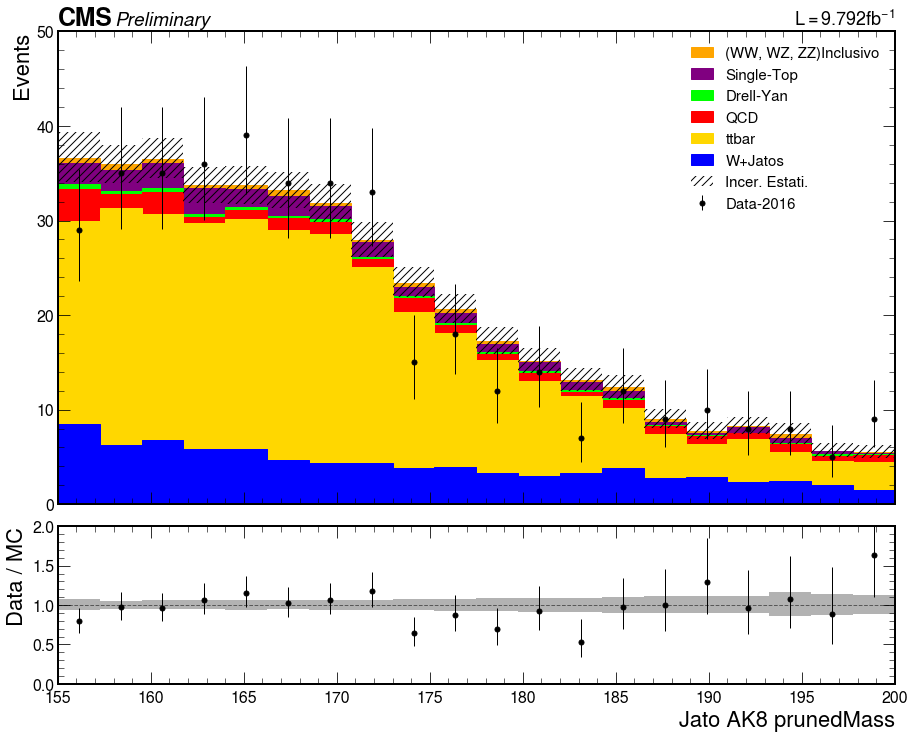

In [67]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(15,12),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

jetAK8_prunedMass = histo.sum( "ExtraTracks" ) 

hist.plot1d(
    jetAK8_prunedMass['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    jetAK8_prunedMass[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)

ax.set_xlabel(None)
ax.set_ylim(0,50)
leg = ax.legend(loc = 'best', fontsize = 15)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$\mathcal{L} = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 


hist.plotratio(
    num=jetAK8_prunedMass['Data-2016'].sum("sample"),
    denom=jetAK8_prunedMass[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(0,2)


# Região de Controle W + Jatos
40 GeV < M pruned < 65 GeV ou 105 GeV < M pruned < 150 GeV
no b-tagged events

In [87]:
DataFrame_multiRP_WJets

,Mww,Pt_W_lep,dPhi_Whad_Wlep,dPhi_jatos_MET,jetAK8_pt,jetAK8_eta,jetAK8_prunedMass,jetAK8_tau21,METPt,muon_pt,muon_eta,ExtraTracks,PUWeight,Yww,Btag,Norm,weight,norm_final
0,524.989362,207.178859,2.762984,3.116662,230.344157,0.437295,53.862301,0.490554,95.148781,122.437660,0.673136,36.0,0.058846,0.695274,0.0,0.331238,1.034848,0.020171
1,638.598802,276.894614,2.979982,3.101716,350.951016,1.436039,22.105497,0.580317,80.313787,197.416245,1.774716,46.0,1.343057,-1.659173,0.0,0.331238,0.901528,0.401065
2,599.204861,257.920103,2.751273,2.589369,256.502987,1.077030,99.227509,0.465615,59.958103,198.980988,2.100925,47.0,0.311971,-1.964431,0.0,0.331238,0.857631,0.088625
3,605.340936,226.999590,3.053121,2.733143,342.683503,1.947105,73.367859,0.492663,81.222517,152.061325,2.255035,48.0,0.698613,2.430256,0.0,0.331238,0.882548,0.204228
4,536.080653,228.730210,2.764322,2.359003,286.724155,1.612398,103.554367,0.552949,58.725868,176.289948,1.363026,55.0,0.024524,-1.340924,0.0,0.331238,0.749054,0.006085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233169,1893.040299,710.131969,3.056770,3.130834,663.088188,2.128214,110.569710,0.325648,343.337215,368.612549,0.448416,42.0,1.279082,0.451517,0.0,0.002282,0.978220,0.002855
233170,1559.972396,816.668391,3.075363,3.071662,740.906271,0.102272,10.150273,0.589180,517.194040,299.484009,0.019078,40.0,1.403685,-0.019329,0.0,0.002282,0.967525,0.003099
233171,1408.591540,615.016135,3.063702,3.064653,696.613862,0.989258,84.908928,0.499461,155.168939,459.847290,1.673233,72.0,1.160782,1.683675,0.0,0.002282,0.632008,0.001674
233172,1695.285567,849.869178,3.101084,3.017402,709.456851,0.146332,59.372601,0.422854,175.653230,674.990295,0.677229,22.0,1.160782,-0.679861,0.0,0.002282,1.294636,0.003429


In [105]:
DataFrame_multiRP_WJets = DataFrame_multiRP_WJets[ (DataFrame_multiRP_WJets['Btag'] == 0) & (DataFrame_multiRP_WJets['jetAK8_prunedMass'] > 40) & (DataFrame_multiRP_WJets['jetAK8_prunedMass'] < 65) | (DataFrame_multiRP_WJets['jetAK8_prunedMass'] > 105) & (DataFrame_multiRP_WJets['jetAK8_prunedMass'] < 150)]
DataFrame_multiRP_TTbar = DataFrame_multiRP_TTbar[ (DataFrame_multiRP_TTbar['Btag'] == 0) & (DataFrame_multiRP_TTbar['jetAK8_prunedMass'] > 40) & (DataFrame_multiRP_TTbar['jetAK8_prunedMass'] < 65) | (DataFrame_multiRP_TTbar['jetAK8_prunedMass'] > 105) & (DataFrame_multiRP_TTbar['jetAK8_prunedMass'] < 150)]
DataFrame_multiRP_QCD = DataFrame_multiRP_QCD[ (DataFrame_multiRP_QCD['Btag'] == 0) & (DataFrame_multiRP_QCD['jetAK8_prunedMass'] > 40) & (DataFrame_multiRP_QCD['jetAK8_prunedMass'] < 65) | (DataFrame_multiRP_QCD['jetAK8_prunedMass'] > 105) & (DataFrame_multiRP_QCD['jetAK8_prunedMass'] < 150)]
DataFrame_multiRP_Drell_Yan = DataFrame_multiRP_Drell_Yan[ (DataFrame_multiRP_Drell_Yan['Btag'] == 0) & (DataFrame_multiRP_Drell_Yan['jetAK8_prunedMass'] > 40) & (DataFrame_multiRP_Drell_Yan['jetAK8_prunedMass'] < 65) | (DataFrame_multiRP_Drell_Yan['jetAK8_prunedMass'] > 105) & (DataFrame_multiRP_Drell_Yan['jetAK8_prunedMass'] < 150)]
DataFrame_multiRP_Single_Top = DataFrame_multiRP_Single_Top[ (DataFrame_multiRP_Single_Top['Btag'] == 0) & (DataFrame_multiRP_Single_Top['jetAK8_prunedMass'] > 40) & (DataFrame_multiRP_Single_Top['jetAK8_prunedMass'] < 65) |(DataFrame_multiRP_Single_Top['jetAK8_prunedMass'] > 105) & (DataFrame_multiRP_Single_Top['jetAK8_prunedMass'] < 150) ]
DataFrame_multiRP_VV_inclusive = DataFrame_multiRP_VV_inclusive[ (DataFrame_multiRP_VV_inclusive['Btag'] == 0) & (DataFrame_multiRP_VV_inclusive['jetAK8_prunedMass'] > 40) & (DataFrame_multiRP_VV_inclusive['jetAK8_prunedMass'] < 65) | (DataFrame_multiRP_VV_inclusive['jetAK8_prunedMass'] > 105) & (DataFrame_multiRP_VV_inclusive['jetAK8_prunedMass'] < 150)]

In [106]:
DataFrame_Data = DataFrame_Data[ (DataFrame_Data['Btag'] == 0) & (DataFrame_Data['jetAK8_prunedMass'] > 40) & (DataFrame_Data['jetAK8_prunedMass'] < 65) | (DataFrame_Data['jetAK8_prunedMass'] > 105) & (DataFrame_Data['jetAK8_prunedMass'] < 150) ]

In [110]:
DataFrame_Data.columns

Index(['Mww', 'Pt_W_lep', 'dPhi_Whad_Wlep', 'dPhi_jatos_MET', 'jetAK8_pt',
       'jetAK8_eta', 'jetAK8_prunedMass', 'jetAK8_tau21', 'METPt', 'muon_pt',
       'muon_eta', 'ExtraTracks', 'PUWeight', 'Yww', 'Btag', 'xi1', 'xi2',
       'angulo_X_1', 'angulo_X_2', 'angulo_Y_1', 'angulo_Y_2', 'rpid_1',
       'rpid_2', 'arm1', 'arm2', 'ismultirp_1', 'ismultirp_2'],
      dtype='object')

In [108]:
bins = 20

histo = hist.Hist("Events",
        hist.Cat("sample", ""), # Os samples aparece na legenda dos gráficos
        hist.Bin("jetAK8_eta", '$Jatos AK8 \eta$', bins, 0, 3.5 ),
        hist.Bin("dPhi_Whad_Wlep", "$\Delta \Phi^{Whad\;Wlep}$", bins, -3, 3 ),  
        hist.Bin("dPhi_jatos_MET", r'$\Delta \Phi^{jatos\;MET}$', bins, -3,3 ),    
        hist.Bin("muon_pt", r'Muon $p_{T}$(GeV)', bins, 40,600 ),
        hist.Bin("jetAK8_pt", r'AK8 Jatos $p_{T}$(GeV)', bins, 200,800 ),
        )
histo.fill(
    sample = "W+Jatos",
    Mww = np.array( DataFrame_multiRP_WJets['Mww'] ),
    MET = np.array( DataFrame_multiRP_WJets['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_WJets['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_WJets['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_WJets['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_WJets['weight'] * DataFrame_multiRP_WJets['Norm'] * DataFrame_multiRP_WJets['PUWeight'] ), 
     )


histo.fill(
    sample = "ttbar",
    Mww = np.array( DataFrame_multiRP_TTbar['Mww'] ),
    MET = np.array( DataFrame_multiRP_TTbar['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_TTbar['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_TTbar['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_TTbar['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_TTbar['weight'] * DataFrame_multiRP_TTbar['Norm'] * DataFrame_multiRP_TTbar['PUWeight'] ), 
     )
    
histo.fill(
    sample = "QCD",
    Mww = np.array( DataFrame_multiRP_QCD['Mww'] ),
    MET = np.array( DataFrame_multiRP_QCD['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_QCD['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_QCD['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_QCD['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_QCD['weight'] * DataFrame_multiRP_QCD['Norm'] * DataFrame_multiRP_QCD['PUWeight'] ), 
     )
    

histo.fill(
    sample = "Drell-Yan",
    Mww = np.array( DataFrame_multiRP_Drell_Yan['Mww'] ),
    MET = np.array( DataFrame_multiRP_Drell_Yan['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_Drell_Yan['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_Drell_Yan['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_Drell_Yan['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_Drell_Yan['weight'] * DataFrame_multiRP_Drell_Yan['Norm'] * DataFrame_multiRP_Drell_Yan['PUWeight'] ), 
     )
    
histo.fill(
    sample = "Single-Top",
    Mww = np.array( DataFrame_multiRP_Single_Top['Mww'] ),
    MET = np.array( DataFrame_multiRP_Single_Top['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_Single_Top['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_Single_Top['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_Single_Top['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_Single_Top['weight'] * DataFrame_multiRP_Single_Top['Norm'] * DataFrame_multiRP_Single_Top['PUWeight'] ), 
     )

histo.fill(
    sample = "(WW, WZ, ZZ)Inclusivo",
    Mww = np.array( DataFrame_multiRP_VV_inclusive['Mww'] ),
    MET = np.array( DataFrame_multiRP_VV_inclusive['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_VV_inclusive['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_VV_inclusive['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_VV_inclusive['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_VV_inclusive['weight'] * DataFrame_multiRP_VV_inclusive['Norm'] * DataFrame_multiRP_VV_inclusive['PUWeight'] ), 
     )

histo.fill(
    sample = "Data-2016",
    Mww = np.array( DataFrame_Data['Mww'] ),
    MET = np.array( DataFrame_Data['METPt'] ),
    muon_pt = np.array(DataFrame_Data['muon_pt']),
    jetAK8_tau21 = np.array( DataFrame_Data['jetAK8_tau21'] ),
    jetAK8_pt = np.array(DataFrame_Data['jetAK8_pt'])
        )


plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 22,
    'axes.labelsize': 22,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16
})

fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 1,
    'color':['blue','gold','red','lime','purple','orange']
}

error_opts = {
    'label': 'Stat. Unc.',
    'hatch': '///',
    'facecolor': 'none',
    'edgecolor': (0,0,0,1),
    'linewidth': 0
}
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

import re
notdata = re.compile('(?!Data-2016)')

/eos/user/m/matheus/.local/lib/python3.8/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/eos/user/m/matheus/.local/lib/python3.8/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = numpy.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
/eos/user/m/matheus/.local/lib/python3.8/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


(0.0, 2.0)

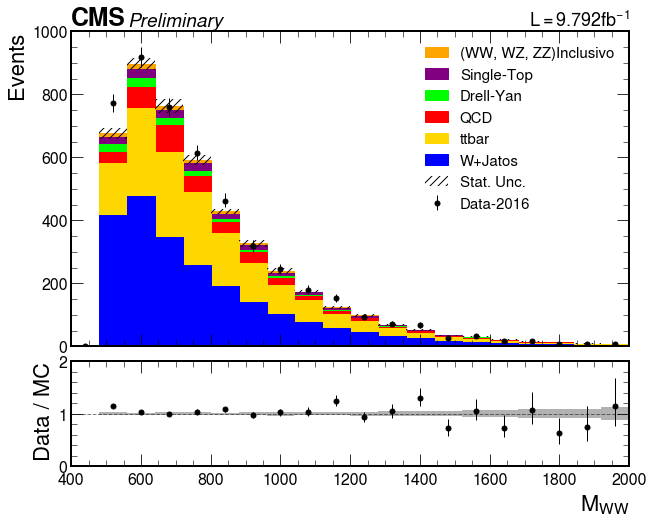

In [109]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

Mww = histo.sum( "MET", "jetAK8_tau21", "muon_pt", "jetAK8_pt" )

hist.plot1d(
    Mww['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    Mww[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)



ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 15)
ax.set_ylim(0,1000)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=Mww['Data-2016'].sum("sample"),
    denom=Mww[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-0,2)
#ax.style.use(hep.style.ROOT)

/eos/user/m/matheus/.local/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/eos/user/m/matheus/.local/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)


(0.0, 2.0)

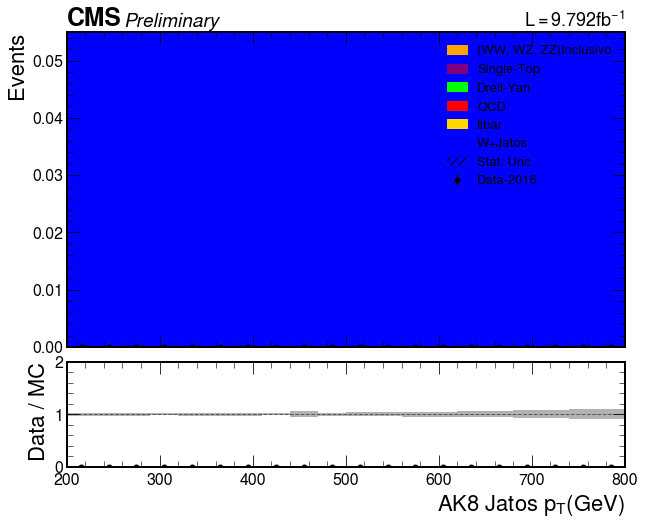

In [92]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

jetAK8_pt = Mww = histo.sum( "MET", "jetAK8_tau21", "muon_pt", "Mww" )

hist.plot1d(
    jetAK8_pt['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    jetAK8_pt[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=jetAK8_pt['Data-2016'].sum("sample"),
    denom=jetAK8_pt[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-0,2)

/eos/user/m/matheus/.local/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)


(0.0, 2.0)

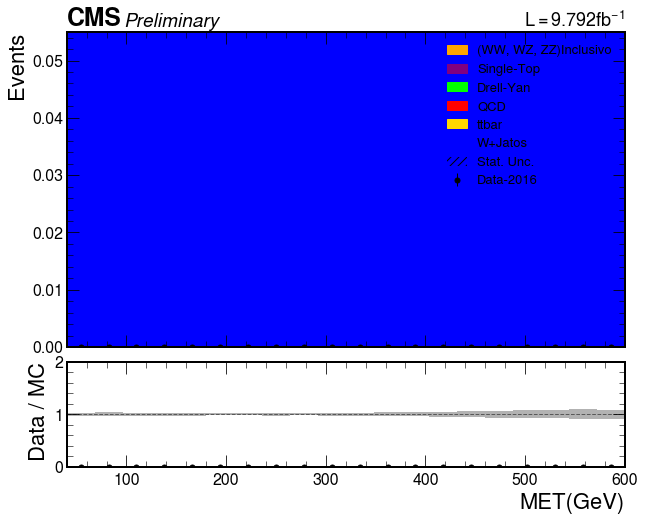

In [93]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

MET = histo.sum( "jetAK8_pt", "jetAK8_tau21", "muon_pt", "Mww" )

hist.plot1d(
    MET['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    MET[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=MET['Data-2016'].sum("sample"),
    denom=MET[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-0,2)

/eos/user/m/matheus/.local/lib/python3.8/site-packages/coffea/hist/plot.py:357: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/eos/user/m/matheus/.local/lib/python3.8/site-packages/coffea/hist/plot.py:364: RuntimeWarning: invalid value encountered in true_divide
  rsumw_err = numpy.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:881: RuntimeWarning: invalid value encountered in greater
  cond = logical_and(cond, (asarray(arg) > 0))
/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/eos/user/m/matheus/.local/lib/python3.8/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = pois

(0.0, 2.0)

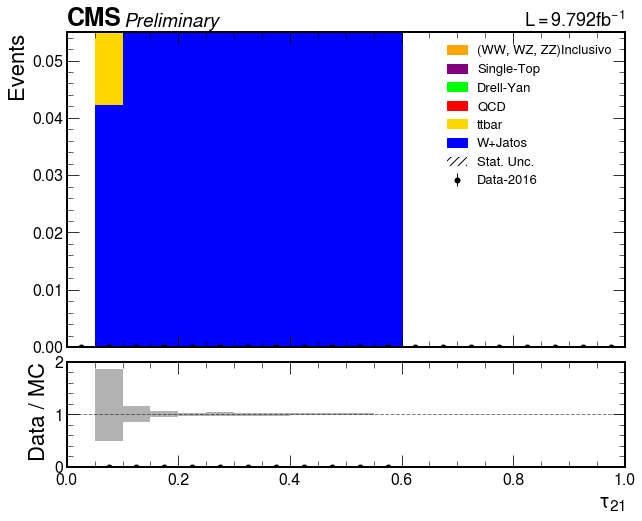

In [94]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

jetAK8_tau21 = histo.sum( "jetAK8_pt", "MET", "muon_pt", "Mww" )

hist.plot1d(
    jetAK8_tau21['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)
hist.plot1d(
    jetAK8_tau21[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=jetAK8_tau21['Data-2016'].sum("sample"),
    denom=jetAK8_tau21[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-0,2)

/eos/user/m/matheus/.local/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)
/eos/user/m/matheus/.local/lib/python3.8/site-packages/coffea/hist/plot.py:44: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)


(0.0, 400.0)

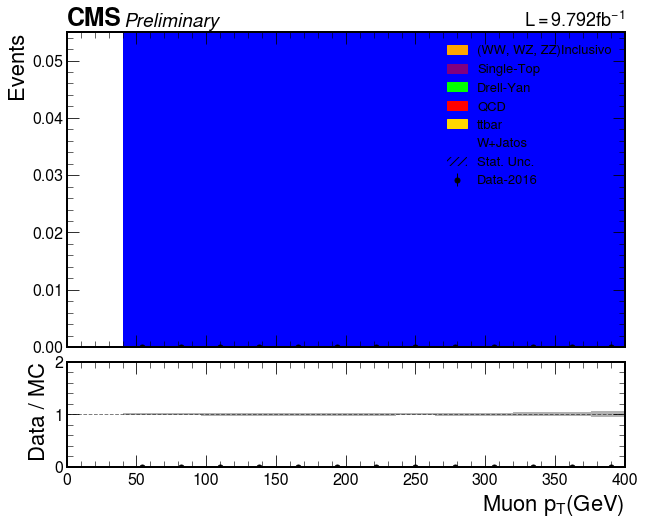

In [95]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

muon_pt = histo.sum( "jetAK8_pt", "jetAK8_tau21", "MET", "Mww" )

hist.plot1d(
    muon_pt['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    muon_pt[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=muon_pt['Data-2016'].sum("sample"),
    denom=muon_pt[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-0,2)
plt.xlim(0,400)

# Região de Signal WW
65 GeV < M pruned < 105 GeV
sem eventos com b-tagging

In [ ]:
DataFrame_multiRP_WJets = DataFrame_multiRP_WJets[ (DataFrame_multiRP_WJets['Btag'] == 0) & (DataFrame_multiRP_WJets['jetAK8_prunedMass'] > 65) & (DataFrame_multiRP_WJets['jetAK8_prunedMass'] < 105)]
DataFrame_multiRP_TTbar = DataFrame_multiRP_TTbar[ (DataFrame_multiRP_TTbar['Btag'] == 0) & (DataFrame_multiRP_TTbar['jetAK8_prunedMass'] > 65) & (DataFrame_multiRP_TTbar['jetAK8_prunedMass'] < 105)]
DataFrame_multiRP_QCD = DataFrame_multiRP_QCD[ (DataFrame_multiRP_QCD['Btag'] == 0) & (DataFrame_multiRP_QCD['jetAK8_prunedMass'] > 65) & (DataFrame_multiRP_QCD['jetAK8_prunedMass'] < 105)]
DataFrame_multiRP_Drell_Yan = DataFrame_multiRP_Drell_Yan[ (DataFrame_multiRP_Drell_Yan['Btag'] == 0) & (DataFrame_multiRP_Drell_Yan['jetAK8_prunedMass'] > 65) & (DataFrame_multiRP_Drell_Yan['jetAK8_prunedMass'] < 105)]
DataFrame_multiRP_Single_Top = DataFrame_multiRP_Single_Top[ (DataFrame_multiRP_Single_Top['Btag'] == 0) &  (DataFrame_multiRP_Single_Top['jetAK8_prunedMass'] > 65) & (DataFrame_multiRP_Single_Top['jetAK8_prunedMass'] < 105)]
DataFrame_multiRP_VV_inclusive = DataFrame_multiRP_VV_inclusive[( DataFrame_multiRP_VV_inclusive['Btag'] == 0) &  (DataFrame_multiRP_VV_inclusive['jetAK8_prunedMass'] > 65) & (DataFrame_multiRP_VV_inclusive['jetAK8_prunedMass'] < 105)]

In [ ]:
DataFrame_Data = DataFrame_Data[ (DataFrame_Data['Btag'] == 0) & (DataFrame_Data['jetAK8_prunedMass'] > 65) &  (DataFrame_Data['jetAK8_prunedMass'] < 105) ]

In [ ]:
bins = 20

histo = hist.Hist("Events",
        hist.Cat("sample", ""), # Os samples aparece na legenda dos gráficos
        hist.Bin("Mww", '$M_{WW}$', bins, 400, 2000 ),
        hist.Bin("MET", "MET(GeV)", bins, 40, 600 ),  
        hist.Bin("jetAK8_tau21", r'$\tau_{21}$', bins, 0,1 ),    
        hist.Bin("muon_pt", r'Muon $p_{T}$(GeV)', bins, 40,600 ),
        hist.Bin("jetAK8_pt", r'AK8 Jatos $p_{T}$(GeV)', bins, 200,800 ),
        )
histo.fill(
    sample = "W+Jatos",
    Mww = np.array( DataFrame_multiRP_WJets['Mww'] ),
    MET = np.array( DataFrame_multiRP_WJets['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_WJets['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_WJets['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_WJets['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_WJets['weight'] * DataFrame_multiRP_WJets['Norm'] * DataFrame_multiRP_WJets['PUWeight'] ), 
     )


histo.fill(
    sample = "ttbar",
    Mww = np.array( DataFrame_multiRP_TTbar['Mww'] ),
    MET = np.array( DataFrame_multiRP_TTbar['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_TTbar['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_TTbar['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_TTbar['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_TTbar['weight'] * DataFrame_multiRP_TTbar['Norm'] * DataFrame_multiRP_TTbar['PUWeight'] ), 
     )
    
histo.fill(
    sample = "QCD",
    Mww = np.array( DataFrame_multiRP_QCD['Mww'] ),
    MET = np.array( DataFrame_multiRP_QCD['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_QCD['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_QCD['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_QCD['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_QCD['weight'] * DataFrame_multiRP_QCD['Norm'] * DataFrame_multiRP_QCD['PUWeight'] ), 
     )
    

histo.fill(
    sample = "Drell-Yan",
    Mww = np.array( DataFrame_multiRP_Drell_Yan['Mww'] ),
    MET = np.array( DataFrame_multiRP_Drell_Yan['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_Drell_Yan['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_Drell_Yan['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_Drell_Yan['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_Drell_Yan['weight'] * DataFrame_multiRP_Drell_Yan['Norm'] * DataFrame_multiRP_Drell_Yan['PUWeight'] ), 
     )
    
histo.fill(
    sample = "Single-Top",
    Mww = np.array( DataFrame_multiRP_Single_Top['Mww'] ),
    MET = np.array( DataFrame_multiRP_Single_Top['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_Single_Top['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_Single_Top['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_Single_Top['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_Single_Top['weight'] * DataFrame_multiRP_Single_Top['Norm'] * DataFrame_multiRP_Single_Top['PUWeight'] ), 
     )

histo.fill(
    sample = "(WW, WZ, ZZ)Inclusivo",
    Mww = np.array( DataFrame_multiRP_VV_inclusive['Mww'] ),
    MET = np.array( DataFrame_multiRP_VV_inclusive['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_VV_inclusive['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_VV_inclusive['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_VV_inclusive['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_VV_inclusive['weight'] * DataFrame_multiRP_VV_inclusive['Norm'] * DataFrame_multiRP_VV_inclusive['PUWeight'] ), 
     )

histo.fill(
    sample = "Data-2016",
    Mww = np.array( DataFrame_Data['Mww'] ),
    MET = np.array( DataFrame_Data['METPt'] ),
    muon_pt = np.array(DataFrame_Data['muon_pt']),
    jetAK8_tau21 = np.array( DataFrame_Data['jetAK8_tau21'] ),
    jetAK8_pt = np.array(DataFrame_Data['jetAK8_pt'])
        )


plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 1,
    'color':['blue','gold','red','lime','purple','orange']
}
error_opts = {
    'label': 'Incer. Estati.',
    'hatch': '///',
    'facecolor': 'none',
    'edgecolor': (0,0,0,1),
    'linewidth': 0
}
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

import re
notdata = re.compile('(?!Data-2016)')

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

Mww = histo.sum( "MET", "jetAK8_tau21", "muon_pt", "jetAK8_pt" )

hist.plot1d(
    Mww['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    Mww[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)



ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 15)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=Mww['Data-2016'].sum("sample"),
    denom=Mww[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)


In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

jetAK8_pt = Mww = histo.sum( "MET", "jetAK8_tau21", "muon_pt", "Mww" )

hist.plot1d(
    jetAK8_pt['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    jetAK8_pt[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=jetAK8_pt['Data-2016'].sum("sample"),
    denom=jetAK8_pt[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

MET = histo.sum( "jetAK8_pt", "jetAK8_tau21", "muon_pt", "Mww" )

hist.plot1d(
    MET['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    MET[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=MET['Data-2016'].sum("sample"),
    denom=MET[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

jetAK8_tau21 = histo.sum( "jetAK8_pt", "MET", "muon_pt", "Mww" )

hist.plot1d(
    jetAK8_tau21['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    jetAK8_tau21[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=jetAK8_tau21['Data-2016'].sum("sample"),
    denom=jetAK8_tau21[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

muon_pt = histo.sum( "jetAK8_pt", "jetAK8_tau21", "MET", "Mww" )

hist.plot1d(
    muon_pt['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    muon_pt[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=muon_pt['Data-2016'].sum("sample"),
    denom=muon_pt[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)
plt.xlim(0,400)

# Região de controle ttbar 1
40 GeV < M pruned  150 GeV 
and one or more b-tagged jets

In [ ]:
DataFrame_multiRP_WJets = DataFrame_multiRP_WJets[ (DataFrame_multiRP_WJets['Btag'] > 0) & (DataFrame_multiRP_WJets['jetAK8_prunedMass'] > 40) & (DataFrame_multiRP_WJets['jetAK8_prunedMass'] < 150)]
DataFrame_multiRP_TTbar = DataFrame_multiRP_TTbar[ (DataFrame_multiRP_TTbar['Btag'] > 0) & (DataFrame_multiRP_TTbar['jetAK8_prunedMass'] > 40) & (DataFrame_multiRP_TTbar['jetAK8_prunedMass'] < 150)]
DataFrame_multiRP_QCD = DataFrame_multiRP_QCD[ (DataFrame_multiRP_QCD['Btag'] > 0) & (DataFrame_multiRP_QCD['jetAK8_prunedMass'] > 40) & (DataFrame_multiRP_QCD['jetAK8_prunedMass'] < 150)]
DataFrame_multiRP_Drell_Yan = DataFrame_multiRP_Drell_Yan[ (DataFrame_multiRP_Drell_Yan['Btag'] > 0) & (DataFrame_multiRP_Drell_Yan['jetAK8_prunedMass'] > 40) & (DataFrame_multiRP_Drell_Yan['jetAK8_prunedMass'] < 150)]
DataFrame_multiRP_Single_Top = DataFrame_multiRP_Single_Top[ (DataFrame_multiRP_Single_Top['Btag'] > 0) &  (DataFrame_multiRP_Single_Top['jetAK8_prunedMass'] > 40) & (DataFrame_multiRP_Single_Top['jetAK8_prunedMass'] < 150)]
DataFrame_multiRP_VV_inclusive = DataFrame_multiRP_VV_inclusive[( DataFrame_multiRP_VV_inclusive['Btag'] > 0) &  (DataFrame_multiRP_VV_inclusive['jetAK8_prunedMass'] > 40) & (DataFrame_multiRP_VV_inclusive['jetAK8_prunedMass'] < 150)]

In [ ]:
DataFrame_Data = DataFrame_Data[ (DataFrame_Data['Btag'] > 0) & (DataFrame_Data['jetAK8_prunedMass'] > 40) &  (DataFrame_Data['jetAK8_prunedMass'] < 150) ]

In [ ]:
bins = 30

histo = hist.Hist("Events",
        hist.Cat("sample", ""), # Os samples aparece na legenda dos gráficos
        hist.Bin("Mww", '$M_{WW}$', bins, 400, 2000 ),
        hist.Bin("MET", "MET(GeV)", bins, 40, 600 ),  
        hist.Bin("jetAK8_tau21", r'$\tau_{21}$', bins, 0,1 ),    
        hist.Bin("muon_pt", r'Muon $p_{T}$(GeV)', bins, 40,600 ),
        hist.Bin("jetAK8_pt", r'AK8 Jatos $p_{T}$(GeV)', bins, 200,800 ),
        )
histo.fill(
    sample = "W+Jatos",
    Mww = np.array( DataFrame_multiRP_WJets['Mww'] ),
    MET = np.array( DataFrame_multiRP_WJets['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_WJets['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_WJets['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_WJets['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_WJets['weight'] * DataFrame_multiRP_WJets['Norm'] * DataFrame_multiRP_WJets['PUWeight'] ), 
     )


histo.fill(
    sample = "ttbar",
    Mww = np.array( DataFrame_multiRP_TTbar['Mww'] ),
    MET = np.array( DataFrame_multiRP_TTbar['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_TTbar['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_TTbar['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_TTbar['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_TTbar['weight'] * DataFrame_multiRP_TTbar['Norm'] * DataFrame_multiRP_TTbar['PUWeight'] ), 
     )
    
histo.fill(
    sample = "QCD",
    Mww = np.array( DataFrame_multiRP_QCD['Mww'] ),
    MET = np.array( DataFrame_multiRP_QCD['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_QCD['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_QCD['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_QCD['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_QCD['weight'] * DataFrame_multiRP_QCD['Norm'] * DataFrame_multiRP_QCD['PUWeight'] ), 
     )
    

histo.fill(
    sample = "Drell-Yan",
    Mww = np.array( DataFrame_multiRP_Drell_Yan['Mww'] ),
    MET = np.array( DataFrame_multiRP_Drell_Yan['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_Drell_Yan['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_Drell_Yan['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_Drell_Yan['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_Drell_Yan['weight'] * DataFrame_multiRP_Drell_Yan['Norm'] * DataFrame_multiRP_Drell_Yan['PUWeight'] ), 
     )
    
histo.fill(
    sample = "Single-Top",
    Mww = np.array( DataFrame_multiRP_Single_Top['Mww'] ),
    MET = np.array( DataFrame_multiRP_Single_Top['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_Single_Top['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_Single_Top['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_Single_Top['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_Single_Top['weight'] * DataFrame_multiRP_Single_Top['Norm'] * DataFrame_multiRP_Single_Top['PUWeight'] ), 
     )

histo.fill(
    sample = "(WW, WZ, ZZ)Inclusivo",
    Mww = np.array( DataFrame_multiRP_VV_inclusive['Mww'] ),
    MET = np.array( DataFrame_multiRP_VV_inclusive['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_VV_inclusive['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_VV_inclusive['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_VV_inclusive['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_VV_inclusive['weight'] * DataFrame_multiRP_VV_inclusive['Norm'] * DataFrame_multiRP_VV_inclusive['PUWeight'] ), 
     )

histo.fill(
    sample = "Data-2016",
    Mww = np.array( DataFrame_Data['Mww'] ),
    MET = np.array( DataFrame_Data['METPt'] ),
    muon_pt = np.array(DataFrame_Data['muon_pt']),
    jetAK8_tau21 = np.array( DataFrame_Data['jetAK8_tau21'] ),
    jetAK8_pt = np.array(DataFrame_Data['jetAK8_pt'])
        )


plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 1,
    'color':['blue','gold','red','lime','purple','orange']
}
error_opts = {
    'label': 'Incer. Estati.',
    'hatch': '///',
    'facecolor': 'none',
    'edgecolor': (0,0,0,1),
    'linewidth': 0
}
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

import re
notdata = re.compile('(?!Data-2016)')

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

Mww = histo.sum( "MET", "jetAK8_tau21", "muon_pt", "jetAK8_pt" )

hist.plot1d(
    Mww['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    Mww[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)



ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 15)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=Mww['Data-2016'].sum("sample"),
    denom=Mww[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)


In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

jetAK8_pt = Mww = histo.sum( "MET", "jetAK8_tau21", "muon_pt", "Mww" )

hist.plot1d(
    jetAK8_pt['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    jetAK8_pt[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=jetAK8_pt['Data-2016'].sum("sample"),
    denom=jetAK8_pt[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

MET = histo.sum( "jetAK8_pt", "jetAK8_tau21", "muon_pt", "Mww" )

hist.plot1d(
    MET['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    MET[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=MET['Data-2016'].sum("sample"),
    denom=MET[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

jetAK8_tau21 = histo.sum( "jetAK8_pt", "MET", "muon_pt", "Mww" )

hist.plot1d(
    jetAK8_tau21['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    jetAK8_tau21[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=jetAK8_tau21['Data-2016'].sum("sample"),
    denom=jetAK8_tau21[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

muon_pt = histo.sum( "jetAK8_pt", "jetAK8_tau21", "MET", "Mww" )

hist.plot1d(
    muon_pt['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    muon_pt[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax.set_ylim(0,400)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=muon_pt['Data-2016'].sum("sample"),
    denom=muon_pt[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)
plt.xlim(0,400)

# Região de Controle ttbar 2
155 GeV < M pruned < 200 GeV 
and no b-tagging requirements

In [ ]:
DataFrame_multiRP_WJets = DataFrame_multiRP_WJets[ (DataFrame_multiRP_WJets['Btag'] == 0) & (DataFrame_multiRP_WJets['jetAK8_prunedMass'] > 155) & (DataFrame_multiRP_WJets['jetAK8_prunedMass'] < 200)]
DataFrame_multiRP_TTbar = DataFrame_multiRP_TTbar[ (DataFrame_multiRP_TTbar['Btag'] == 0) & (DataFrame_multiRP_TTbar['jetAK8_prunedMass'] > 155) & (DataFrame_multiRP_TTbar['jetAK8_prunedMass'] < 200)]
DataFrame_multiRP_QCD = DataFrame_multiRP_QCD[ (DataFrame_multiRP_QCD['Btag'] == 0) & (DataFrame_multiRP_QCD['jetAK8_prunedMass'] > 155) & (DataFrame_multiRP_QCD['jetAK8_prunedMass'] < 200)]
DataFrame_multiRP_Drell_Yan = DataFrame_multiRP_Drell_Yan[ (DataFrame_multiRP_Drell_Yan['Btag'] == 0) & (DataFrame_multiRP_Drell_Yan['jetAK8_prunedMass'] > 155) & (DataFrame_multiRP_Drell_Yan['jetAK8_prunedMass'] < 200)]
DataFrame_multiRP_Single_Top = DataFrame_multiRP_Single_Top[ (DataFrame_multiRP_Single_Top['Btag'] == 0) &  (DataFrame_multiRP_Single_Top['jetAK8_prunedMass'] > 155) & (DataFrame_multiRP_Single_Top['jetAK8_prunedMass'] < 200)]
DataFrame_multiRP_VV_inclusive = DataFrame_multiRP_VV_inclusive[( DataFrame_multiRP_VV_inclusive['Btag'] == 0) &  (DataFrame_multiRP_VV_inclusive['jetAK8_prunedMass'] > 155) & (DataFrame_multiRP_VV_inclusive['jetAK8_prunedMass'] < 200)]

In [ ]:
DataFrame_Data = DataFrame_Data[ (DataFrame_Data['Btag'] == 0) & (DataFrame_Data['jetAK8_prunedMass'] > 155) &  (DataFrame_Data['jetAK8_prunedMass'] < 200) ]

In [ ]:
bins = 20

histo = hist.Hist("Events",
        hist.Cat("sample", ""), # Os samples aparece na legenda dos gráficos
        hist.Bin("Mww", '$M_{WW}$', bins, 400, 2000 ),
        hist.Bin("MET", "MET(GeV)", bins, 40, 600 ),  
        hist.Bin("jetAK8_tau21", r'$\tau_{21}$', bins, 0,1 ),    
        hist.Bin("muon_pt", r'Muon $p_{T}$(GeV)', bins, 40,600 ),
        hist.Bin("jetAK8_pt", r'AK8 Jatos $p_{T}$(GeV)', bins, 200,800 ),
        )
histo.fill(
    sample = "W+Jatos",
    Mww = np.array( DataFrame_multiRP_WJets['Mww'] ),
    MET = np.array( DataFrame_multiRP_WJets['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_WJets['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_WJets['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_WJets['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_WJets['weight'] * DataFrame_multiRP_WJets['Norm'] * DataFrame_multiRP_WJets['PUWeight'] ), 
     )


histo.fill(
    sample = "ttbar",
    Mww = np.array( DataFrame_multiRP_TTbar['Mww'] ),
    MET = np.array( DataFrame_multiRP_TTbar['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_TTbar['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_TTbar['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_TTbar['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_TTbar['weight'] * DataFrame_multiRP_TTbar['Norm'] * DataFrame_multiRP_TTbar['PUWeight'] ), 
     )
    
histo.fill(
    sample = "QCD",
    Mww = np.array( DataFrame_multiRP_QCD['Mww'] ),
    MET = np.array( DataFrame_multiRP_QCD['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_QCD['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_QCD['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_QCD['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_QCD['weight'] * DataFrame_multiRP_QCD['Norm'] * DataFrame_multiRP_QCD['PUWeight'] ), 
     )
    

histo.fill(
    sample = "Drell-Yan",
    Mww = np.array( DataFrame_multiRP_Drell_Yan['Mww'] ),
    MET = np.array( DataFrame_multiRP_Drell_Yan['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_Drell_Yan['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_Drell_Yan['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_Drell_Yan['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_Drell_Yan['weight'] * DataFrame_multiRP_Drell_Yan['Norm'] * DataFrame_multiRP_Drell_Yan['PUWeight'] ), 
     )
    
histo.fill(
    sample = "Single-Top",
    Mww = np.array( DataFrame_multiRP_Single_Top['Mww'] ),
    MET = np.array( DataFrame_multiRP_Single_Top['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_Single_Top['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_Single_Top['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_Single_Top['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_Single_Top['weight'] * DataFrame_multiRP_Single_Top['Norm'] * DataFrame_multiRP_Single_Top['PUWeight'] ), 
     )

histo.fill(
    sample = "(WW, WZ, ZZ)Inclusivo",
    Mww = np.array( DataFrame_multiRP_VV_inclusive['Mww'] ),
    MET = np.array( DataFrame_multiRP_VV_inclusive['METPt'] ),
    jetAK8_tau21 = np.array( DataFrame_multiRP_VV_inclusive['jetAK8_tau21'] ),
    muon_pt = np.array(DataFrame_multiRP_VV_inclusive['muon_pt']),
    jetAK8_pt = np.array(DataFrame_multiRP_VV_inclusive['jetAK8_pt']),
    weight = np.array( DataFrame_multiRP_VV_inclusive['weight'] * DataFrame_multiRP_VV_inclusive['Norm'] * DataFrame_multiRP_VV_inclusive['PUWeight'] ), 
     )

histo.fill(
    sample = "Data-2016",
    Mww = np.array( DataFrame_Data['Mww'] ),
    MET = np.array( DataFrame_Data['METPt'] ),
    muon_pt = np.array(DataFrame_Data['muon_pt']),
    jetAK8_tau21 = np.array( DataFrame_Data['jetAK8_tau21'] ),
    jetAK8_pt = np.array(DataFrame_Data['jetAK8_pt'])
        )


plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 1,
    'color':['blue','gold','red','lime','purple','orange']
}
error_opts = {
    'label': 'Incer. Estati.',
    'hatch': '///',
    'facecolor': 'none',
    'edgecolor': (0,0,0,1),
    'linewidth': 0
}
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

import re
notdata = re.compile('(?!Data-2016)')

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

Mww = histo.sum( "MET", "jetAK8_tau21", "muon_pt", "jetAK8_pt" )

hist.plot1d(
    Mww['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    Mww[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)



ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 15)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=Mww['Data-2016'].sum("sample"),
    denom=Mww[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)


In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

jetAK8_pt = Mww = histo.sum( "MET", "jetAK8_tau21", "muon_pt", "Mww" )

hist.plot1d(
    jetAK8_pt['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    jetAK8_pt[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=jetAK8_pt['Data-2016'].sum("sample"),
    denom=jetAK8_pt[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

MET = histo.sum( "jetAK8_pt", "jetAK8_tau21", "muon_pt", "Mww" )

hist.plot1d(
    MET['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    MET[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=MET['Data-2016'].sum("sample"),
    denom=MET[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

jetAK8_tau21 = histo.sum( "jetAK8_pt", "MET", "muon_pt", "Mww" )

hist.plot1d(
    jetAK8_tau21['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    jetAK8_tau21[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=jetAK8_tau21['Data-2016'].sum("sample"),
    denom=jetAK8_tau21[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)

In [ ]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

muon_pt = histo.sum( "jetAK8_pt", "jetAK8_tau21", "MET", "Mww" )

hist.plot1d(
    muon_pt['Data-2016'],
    overlay="sample",
    clear=True,
    ax=ax,
    error_opts=data_err_opts
)

hist.plot1d(
    muon_pt[notdata],
    overlay='sample',
    stack=True,
    order = ['W+Jatos', 'ttbar', 'QCD' , 'Drell-Yan', 'Single-Top', '(WW, WZ, ZZ)Inclusivo'],
    clear=False,
    ax=ax,
    line_opts=False,
    fill_opts=fill_opts,
    error_opts=error_opts
)


ax.set_xlabel(None)
leg = ax.legend(loc = 'best', fontsize = 13)
ax = hep.cms.label(llabel="Preliminary", rlabel = r"$L = 9.792 fb^{-1}$", ax = ax, fontsize = 19) 

hist.plotratio(
    num=muon_pt['Data-2016'].sum("sample"),
    denom=muon_pt[notdata].sum("sample"),
    ax=rax,
    error_opts=data_err_opts,
    denom_fill_opts={},
    guide_opts={},
    unc='num'
)
rax.set_ylabel('Data / MC')
rax.set_ylim(-1,3)
plt.xlim(0,400)

In [ ]:
sys.exit()

## Criando arquivos únicos em .h5 de signal, background e dados

In [ ]:
def salve_dataset( df, label ):
    with h5py.File( label + '.h5', 'w') as f:
        dset = f.create_dataset( 'dados', data = df )
        columns = f.create_dataset( 'columns', data = df )
    return dset   

In [ ]:
DataFrame_Data[ (DataFrame_Data['ismultirp_1']==1) & (DataFrame_Data['ismultirp_2']==1) ]

In [ ]:
select_columns_MC = ['Mww', 'Pt_W_lep', 'dPhi_Whad_Wlep', 'dPhi_jatos_MET', 'jetAK8_pt','jetAK8_eta', 'jetAK8_prunedMass',
'jetAK8_tau21', 'METPt', 'muon_pt', 'muon_eta', 'ExtraTracks', 'PUWeight', 'Yww', 'Btag', 'xi1', 'xi2'
,'weight']
select_columns_Data = np.array( ['Mww', 'Pt_W_lep', 'dPhi_Whad_Wlep', 'dPhi_jatos_MET', 'jetAK8_pt','jetAK8_eta', 
'jetAK8_prunedMass','jetAK8_tau21', 'METPt', 'muon_pt', 'muon_eta', 'ExtraTracks', 'PUWeight', 'Btag',
'Yww', 'xi1', 'xi2','arm1', 'arm2', 'ismultirp_1','ismultirp_2'] ).astype(str)

In [ ]:
def salve_dataset( df, label ):
    with h5py.File( label + '.h5', 'w') as f:
        dset = f.create_dataset( 'dados', data = df )
    return dset

In [ ]:
salve_dataset(DataFrame_multiRP_ANOMALO1[select_columns_MC], pwd_effi + 'DataSet_ANOMALO1_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO2[select_columns_MC],pwd_effi +  'DataSet_ANOMALO2_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO3[select_columns_MC], pwd_effi + 'DataSet_ANOMALO3_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO4[select_columns_MC], pwd_effi + 'DataSet_ANOMALO4_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO5[select_columns_MC],pwd_effi +  'DataSet_ANOMALO5_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO6[select_columns_MC],pwd_effi +  'DataSet_ANOMALO6_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO7[select_columns_MC],pwd_effi +  'DataSet_ANOMALO7_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO8[select_columns_MC],pwd_effi +  'DataSet_ANOMALO8_multiRP')

In [ ]:
DataFrame_multiRP_ANOMALO1[select_columns_MC]

In [ ]:
data_set_dados_multirp

In [ ]:
salve_dataset(data_set_back_multirp[select_columns_MC], pwd_effi + 'DataSet_back_multiRP')

In [ ]:
#salve_dataset(DataFrame_data_set_back_multirp[select_columns_MC] , 'DataSet_back_multiRP')

salve_dataset(data_set_dados_multirp[select_columns_Data], pwd_effi + 'DataSet_dados_multiRP_Sem_Corte')

salve_dataset(DataFrame_multiRP_Drell_Yan[select_columns_MC], pwd_effi + 'DataSet_multiRP_DrellYan_Sem_Corte')
salve_dataset(DataFrame_multiRP_QCD[select_columns_MC], pwd_effi + 'DataSet_multiRP_QCD_Sem_Corte')
salve_dataset(DataFrame_multiRP_single_top[select_columns_MC], pwd_effi + 'DataSet_multiRP_single_top_Sem_Corte')
salve_dataset(DataFrame_multiRP_TTbar[select_columns_MC], pwd_effi + 'DataSet_multiRP_TTbar_Sem_Corte')
salve_dataset(DataFrame_multiRP_WJets[select_columns_MC], pwd_effi + 'DataSet_multiRP_WJets_Sem_Corte')
salve_dataset(DataFrame_multiRP_VV_inclusivo[select_columns_MC], pwd_effi + 'DataSet_multiRP_VV_inclusivo_Sem_Corte
salve_dataset(DataFrame_multiRP_SM[select_columns_MC], pwd_effi + 'DataSet_SM_multiRP_Sem_Corte')
'''              
salve_dataset(DataFrame_multiRP_ANOMALO1[select_columns_MC], pwd_effi + 'DataSet_ANOMALO1_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO2[select_columns_MC],pwd_effi +  'DataSet_ANOMALO2_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO3[select_columns_MC], pwd_effi + 'DataSet_ANOMALO3_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO4[select_columns_MC], pwd_effi + 'DataSet_ANOMALO4_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO5[select_columns_MC],pwd_effi +  'DataSet_ANOMALO5_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO6[select_columns_MC],pwd_effi +  'DataSet_ANOMALO6_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO7[select_columns_MC],pwd_effi +  'DataSet_ANOMALO7_multiRP')
salve_dataset(DataFrame_multiRP_ANOMALO8[select_columns_MC],pwd_effi +  'DataSet_ANOMALO8_multiRP')
'''
#salve_dataset(data_set_back_multirp[select_columns_MC], pwd_effi + 'DataSet_back_multiRP')


In [ ]:
DataFrame_multiRP_ANOMALO1.columns

In [ ]:
fig, ax = plt.subplots( 1, 2, figsize=(24,15) )

ax[0].hist( DataFrame_multiRP_ANOMALO1['Mww'], linewidth=1.8, ls = '-', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=20 \times 10^{-6}$', range = (0,2000), histtype = 'step', weights = DataFrame_multiRP_ANOMALO1['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO2['Mww'], linewidth=1.8, ls = '-', range = (0,2000), label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', histtype = 'step', weights = DataFrame_multiRP_ANOMALO2['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO3['Mww'], linewidth=1.8, ls = '-', range = (0,2000), histtype = 'step', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO3['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO4['Mww'], linewidth=1.8, ls = '-', range = (0,2000), histtype = 'step',  label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=20 \times 10^{-6}$', weights = DataFrame_multiRP_ANOMALO4['weight'] )
ax[0].hist( DataFrame_multiRP_SM['Mww'], linewidth=1.8, ls = ':', range = (0,2000), histtype = 'step', weights = DataFrame_multiRP_SM['weight'], label = 'SM' )
ax[0].set_yscale('log')
ax[0].legend(loc='best', fontsize = 15)
ax[0].set_xlim(0,3000)
ax[0].set_xlabel(r'$M_{WW}$')
ax[0].set_ylabel(r'$Eventos$')

ax[1].hist( DataFrame_multiRP_ANOMALO5['Mww'], linewidth=1.8, ls = '-', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2}=0.5 \times 10^{-6}$', range = (0,2000), histtype = 'step', weights = DataFrame_multiRP_ANOMALO5['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO6['Mww'], linewidth=1.8, ls = '-', range = (0,2000), label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2}=1.0 \times 10^{-5}$', histtype = 'step', weights = DataFrame_multiRP_ANOMALO6['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO7['Mww'], linewidth=1.8, ls = '-', range = (0,2000), histtype = 'step', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO7['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO8['Mww'], linewidth=1.8, ls = '-', range = (0,2000), histtype = 'step',  label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO8['weight'] )
ax[1].hist( DataFrame_multiRP_SM['Mww'], linewidth=1.8, ls = ':', range = (0,2000), histtype = 'step', weights = DataFrame_multiRP_SM['weight'], label = 'SM' )
ax[1].set_yscale('log')
ax[1].legend(loc='best', fontsize = 15)
ax[1].set_xlim(0,3000)
ax[1].set_xlabel(r'$M_{WW}$')
ax[1].set_ylabel(r'$Eventos$')

In [ ]:
var = 'jetAK8_tau21'
range_ = (0,1)
label = 'jetAK8_tau21'

fig, ax = plt.subplots( 1, 2, figsize=(24,15) )

ax[0].hist( DataFrame_multiRP_ANOMALO1[var], linewidth=1.8, ls = '-', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=20 \times 10^{-6}$', range = range_, histtype = 'step', weights = DataFrame_multiRP_ANOMALO1['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO2[var], linewidth=1.8, ls = '-', range = range_, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', histtype = 'step', weights = DataFrame_multiRP_ANOMALO2['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO3[var], linewidth=1.8, ls = '-', range = range_, histtype = 'step', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO3['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO4[var], linewidth=1.8, ls = '-', range = range_, histtype = 'step',  label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=20 \times 10^{-6}$', weights = DataFrame_multiRP_ANOMALO4['weight'] )
ax[0].hist( DataFrame_multiRP_SM[var], linewidth=1.8, ls = ':', range = range_, histtype = 'step', weights = DataFrame_multiRP_SM['weight'], label = 'SM' )
ax[0].set_yscale('log')
ax[0].legend(loc='best', fontsize = 15)
#ax[0].set_xlim(0,3000)
ax[0].set_xlabel(label)
ax[0].set_ylabel(r'$Eventos$')

ax[1].hist( DataFrame_multiRP_ANOMALO5[var], linewidth=1.8, ls = '-', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2}=0.5 \times 10^{-6}$', range = range_, histtype = 'step', weights = DataFrame_multiRP_ANOMALO5['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO6[var], linewidth=1.8, ls = '-', range = range_, label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2}=1.0 \times 10^{-5}$', histtype = 'step', weights = DataFrame_multiRP_ANOMALO6['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO7[var], linewidth=1.8, ls = '-', range = range_, histtype = 'step', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO7['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO8[var], linewidth=1.8, ls = '-', range = range_, histtype = 'step',  label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO8['weight'] )
ax[1].hist( DataFrame_multiRP_SM[var], linewidth=1.8, ls = ':', range = range_, histtype = 'step', weights = DataFrame_multiRP_SM['weight'], label = 'SM' )
ax[1].set_yscale('log')
ax[1].legend(loc='best', fontsize = 15)
#ax[1].set_xlim(0,3000)
ax[1].set_xlabel(label)
ax[1].set_ylabel(r'$Eventos$')

In [ ]:
var = 'Mww/Mx'
range_ = (0,2)
label = r'$\dfrac{M_{PPS}}{M_{PPS}}$'

fig, ax = plt.subplots( 1, 2, figsize=(24,15) )

ax[0].hist( DataFrame_multiRP_ANOMALO1[var], linewidth=1.8, ls = '-', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=20 \times 10^{-6}$', range = range_, histtype = 'step', weights = DataFrame_multiRP_ANOMALO1['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO2[var], linewidth=1.8, ls = '-', range = range_, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', histtype = 'step', weights = DataFrame_multiRP_ANOMALO2['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO3[var], linewidth=1.8, ls = '-', range = range_, histtype = 'step', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO3['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO4[var], linewidth=1.8, ls = '-', range = range_, histtype = 'step',  label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=20 \times 10^{-6}$', weights = DataFrame_multiRP_ANOMALO4['weight'] )
ax[0].hist( DataFrame_multiRP_SM[var], linewidth=1.8, ls = ':', range = range_, histtype = 'step', weights = DataFrame_multiRP_SM['weight'], label = 'SM' )
ax[0].set_yscale('log')
ax[0].legend(loc='best', fontsize = 15)
#ax[0].set_xlim(0,3000)
ax[0].set_xlabel(label)
ax[0].set_ylabel(r'$Eventos$')

ax[1].hist( DataFrame_multiRP_ANOMALO5[var], linewidth=1.8, ls = '-', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2}=0.5 \times 10^{-6}$', range = range_, histtype = 'step', weights = DataFrame_multiRP_ANOMALO5['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO6[var], linewidth=1.8, ls = '-', range = range_, label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2}=1.0 \times 10^{-5}$', histtype = 'step', weights = DataFrame_multiRP_ANOMALO6['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO7[var], linewidth=1.8, ls = '-', range = range_, histtype = 'step', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO7['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO8[var], linewidth=1.8, ls = '-', range = range_, histtype = 'step',  label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO8['weight'] )
ax[1].hist( DataFrame_multiRP_SM[var], linewidth=1.8, ls = ':', range = range_, histtype = 'step', weights = DataFrame_multiRP_SM['weight'], label = 'SM' )
ax[1].set_yscale('log')
ax[1].legend(loc='best', fontsize = 15)
#ax[1].set_xlim(0,3000)
ax[1].set_xlabel(label)
ax[1].set_ylabel(r'$Eventos$')

In [ ]:
var = 'ExtraTracks'
range_ = (0,40)
label = 'Extra Tracks'

fig, ax = plt.subplots( 1, 2, figsize=(24,15) )

ax[0].hist( DataFrame_multiRP_ANOMALO1[var], linewidth=1.8, ls = '-', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=20 \times 10^{-6}$', range = range_, histtype = 'step', weights = DataFrame_multiRP_ANOMALO1['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO2[var], linewidth=1.8, ls = '-', range = range_, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', histtype = 'step', weights = DataFrame_multiRP_ANOMALO2['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO3[var], linewidth=1.8, ls = '-', range = range_, histtype = 'step', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO3['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO4[var], linewidth=1.8, ls = '-', range = range_, histtype = 'step',  label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=20 \times 10^{-6}$', weights = DataFrame_multiRP_ANOMALO4['weight'] )
ax[0].hist( DataFrame_multiRP_SM[var], linewidth=1.8, ls = ':', range = range_, histtype = 'step', weights = DataFrame_multiRP_SM['weight'], label = 'SM' )
ax[0].set_yscale('log')
ax[0].legend(loc='best', fontsize = 15)
#ax[0].set_xlim(0,3000)
ax[0].set_xlabel(label)
ax[0].set_ylabel(r'$Eventos$')

ax[1].hist( DataFrame_multiRP_ANOMALO5[var], linewidth=1.8, ls = '-', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2}=0.5 \times 10^{-6}$', range = range_, histtype = 'step', weights = DataFrame_multiRP_ANOMALO5['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO6[var], linewidth=1.8, ls = '-', range = range_, label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2}=1.0 \times 10^{-5}$', histtype = 'step', weights = DataFrame_multiRP_ANOMALO6['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO7[var], linewidth=1.8, ls = '-', range = range_, histtype = 'step', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO7['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO8[var], linewidth=1.8, ls = '-', range = range_, histtype = 'step',  label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO8['weight'] )
ax[1].hist( DataFrame_multiRP_SM[var], linewidth=1.8, ls = ':', range = range_, histtype = 'step', weights = DataFrame_multiRP_SM['weight'], label = 'SM' )
ax[1].set_yscale('log')
ax[1].legend(loc='best', fontsize = 15)
#ax[1].set_xlim(0,3000)
ax[1].set_xlabel(label)
ax[1].set_ylabel(r'$Eventos$')

In [ ]:
var = 'jetAK8_prunedMass'
range_ = (0,150)
label = 'jetAK8_prunedMasss'

fig, ax = plt.subplots( 1, 2, figsize=(24,15) )

ax[0].hist( DataFrame_multiRP_ANOMALO1[var], density = True, linewidth=2.0, ls = '-', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=20 \times 10^{-6}$', range = range_, histtype = 'step', weights = DataFrame_multiRP_ANOMALO1['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO2[var], density = True, linewidth=2.0, ls = '-', range = range_, label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', histtype = 'step', weights = DataFrame_multiRP_ANOMALO2['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO3[var], density = True, linewidth=2.0, ls = '-', range = range_, histtype = 'step', label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO3['weight'] )
ax[0].hist( DataFrame_multiRP_ANOMALO4[var], density = True, linewidth=2.0, ls = '-', range = range_, histtype = 'step',  label = r'WWCEP $\alpha_{C}^{W}/\Lambda^{2}=20 \times 10^{-6}$', weights = DataFrame_multiRP_ANOMALO4['weight'] )
ax[0].hist( DataFrame_multiRP_SM[var], density = True, linewidth=2.0, ls = '--', range = range_, histtype = 'step', weights = DataFrame_multiRP_SM['weight'], label = 'SM' )
#ax[0].set_yscale('log')
ax[0].legend(loc='best', fontsize = 15)
#ax[0].set_xlim(0,3000)
ax[0].set_xlabel(label)
ax[0].set_ylabel('p.d.f.')

ax[1].hist( DataFrame_multiRP_ANOMALO5[var], linewidth=2.0, ls = '-', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2}=0.5 \times 10^{-6}$', range = range_, histtype = 'step', weights = DataFrame_multiRP_ANOMALO5['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO6[var], linewidth=2.0, ls = '-', range = range_, label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2}=1.0 \times 10^{-5}$', histtype = 'step', weights = DataFrame_multiRP_ANOMALO6['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO7[var], linewidth=2.0, ls = '-', range = range_, histtype = 'step', label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 2.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO7['weight'] )
ax[1].hist( DataFrame_multiRP_ANOMALO8[var], linewidth=2.0, ls = '-', range = range_, histtype = 'step',  label = r'WWCEP $\alpha_{0}^{W}/\Lambda^{2} = 5.0 \times 10^{-6} $', weights = DataFrame_multiRP_ANOMALO8['weight'] )
ax[1].hist( DataFrame_multiRP_SM[var], linewidth=2.0, ls = '--', range = range_, histtype = 'step', weights = DataFrame_multiRP_SM['weight'], label = 'SM' )
#ax[1].set_yscale('log')
ax[1].legend(loc='best', fontsize = 15)
#ax[1].set_xlim(0,3000)
ax[1].set_xlabel(label)
ax[1].set_ylabel(r'$Eventos$')